Our mission is to help optimize marketing expenses for Yandex.Afisha.<br>
Yandex.Afisha is a service where a viewer can find out about events in the city and buy tickets for them, and a partner can provide him with information or tickets. Yandex.Afisha is not only a website, but also many other tools for working with events and tickets. 

# Downloading the data
<a class="anchor" id="Overviewandstudyingthegeneralinformation"></a>

First, Let's install sidetable, this tool will help us in our data preprocessing.
Second, Let's install squarify (Will help us with our graphs in the future)

In [1]:
#pip install sidetable

In [2]:
#pip install squarify

#### Importing libraries

In [3]:
import sidetable
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

#### Importing Files

Storing the data on visits, orders, and expenses in variables

In [4]:
visits = pd.read_csv('visits_log_us.csv')
orders = pd.read_csv ('orders_log_us.csv')
expenses = pd.read_csv('costs_us.csv')

# Overview and studying the general information
<a class="anchor" id="Overviewandstudyingthegeneralinformation"></a>

Let's take a quick look at the tables we have, using the head() method and printing the first five rows and using the info() method to prints information about them. 

### visits <br>
It's about server logs with data on website visits<br>

In [5]:
#Print the first rows from the table using the head() method.
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [6]:
#The info() method prints information about the DataFrame
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


**We have 359400 rows in the visits table
<br>
<br>We have 5 columns in the visits table**<br>
**Uid** — user's unique identifier<br>
**Device** — user's device<br>
**Start Ts** — session start date and time<br>
**End Ts** — session end date and time<br>
**Source Id** — identifier of the ad source the user came from<br>
<br>
<br>
**Data types:** 
* The columns Start Ts and End Ts contain the date and time, but there types are object. 
* All the remaining data types look good to us. 

**No missing values in the visits table!**

**Let's check for unique values in the Uid column**<br>
We want to know which Uid (user's unique identifier) we have and their distribution.

In [7]:
visits['Uid'].value_counts()

12869801667763685675    893
3263486045884611639     615
11255648391090536411    551
17030528792926543083    357
8056418121947262981     343
                       ... 
1697418453653713497       1
14532781892786232034      1
16822398512734559234      1
18366668012474472627      1
3266363999948772866       1
Name: Uid, Length: 228169, dtype: int64

We have 228169 different Uid and 359400 rows in the visits table!. <br>
This due to some users visiting Yandex.Afisha more than once.

**Let's check for unique values in the devices column**<br>

In [8]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

Great! We have two types of devices: desktop and touch. And most of the visits to the Yandex.Afisha app or web site are performed from a desktop device.

 **Let's check for unique values in the Source Id column**<br>
The Source Id is the identifier of the ad source the user came from. We want to know how many source Id we have and their distribution.

In [9]:
visits['Source Id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

The different Source Id we have are: 1, 2, 3, 4, 5, 6, 7, 9, 10. 

### orders 
The orders table it's about data on orders (users that usually bought a ticket for an event)<br>
La tabla de pedidos se trata de datos sobre pedidos. 

In [10]:
#Print the first rows from the table using the head() method.
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [11]:
#The info() method prints information about the DataFrame
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


**We have 50415 rows in the orders table**
The number of rows in the orders table is much less that the 359400 rows in the visits table.
This have sense, because not all visits lead to sales.
<br>
<br>**We have 3 columns in the visits table**<br>
**Uid** — unique identifier of the user making an order<br>
**Buy Ts** — order date and time<br>
**Revenue** — Yandex.Afisha's revenue from the order<br>
<br>
<br>
**Data types:** 
* The column Buy Ts contain the date and time the visitor made the order, but the types is object. 
* All the remaining data types looks good to us. 

**Let's check for unique values in the Uid column**<br>
We want to know which Uid (user's unique identifier) we have and their distribution.

In [12]:
orders['Uid'].value_counts()

3644482766749211722     239
13888745432979765063    238
11920452646463905188    227
6731421022966725351     183
5139615590553126732     150
                       ... 
1039442909910620438       1
42362552951081637         1
8069118931487899422       1
17649287249444736221      1
83872787173869366         1
Name: Uid, Length: 36523, dtype: int64

We see that 36523 different users became actual buyers and ordered tickets from Yandex.Afisha. 
The main goal of any business is to make money for its owners, and in our case the main goal of Yandex.Afisha it's sells many tickets as possible.

**Let's make some visualizations!**<br>
**Number of different users that visited Yandex.Afisha and number of different users that became actual buyers.**

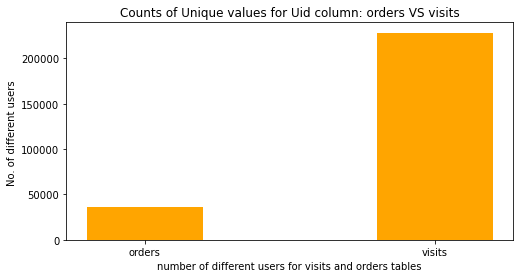

In [13]:
data = {'orders':orders['Uid'].value_counts().count(), 
        'visits':visits['Uid'].value_counts().count()}
keys = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (8, 4))
 
# creating the bar plot
plt.bar(keys, values, color ='orange',
        width = 0.4)
 
plt.xlabel("number of different users for visits and orders tables")
plt.ylabel("No. of different users ")
plt.title("Counts of Unique values for Uid column: orders VS visits")
plt.show()

We can see that the diferrent is really sifnificant! This means that the number of users that reach the last stage is significant lower that the number of users that started to interact with Yandex.Afisha.

### expenses
The expenses table it's about data on marketing expenses.

In [14]:
#Print the first rows from the table using the head() method.
expenses.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [15]:
#The info() method prints information about the DataFrame
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


#### **We have 2542 rows in the expenses table**<br>

**We have 3 columns in the expenses table**<br>
**source_id** — ad source identifier<br>
**dt** — date <br>
**costs** — expenses on this ad source on this day <br>
<br>
<br>
**Data types:** <br>
* The column dt contain the date for the spend for each specific view (it's important to remember that the marketing of the company pays for every user view)
* All the remaining data types look good to us. 

**Let's check for unique values in the source_id column**<br>
We want to know how many different ad source identifier we have and their distribution.

In [16]:
expenses['source_id'].value_counts()

5     364
1     363
2     363
3     363
4     363
9     363
10    363
Name: source_id, dtype: int64

The different Source Id we have are: 1, 2, 3, 4, 5, 9, 10.  <br> 
**This means that all the sources for marketing the company pay for are generating visits! Great!**
<br> 
<br> 
In addition, we can appreciate that the ads source identifier 7 and 6 are not part of our results (but there are users in the visits table that have this Source Id). This means that there are two different sources for marketing that are generating visits but the company it's not paying for them!
<br> 
How many visits they generated? The Source Id 7 generated 36 visits, and the Source Id 6 generated 6 visits. That's nothing in comparison with the visits coming from all rest of sources! Maybe we have duplicates in the visits tables and we don't for real have all that visits coming from all rest of sources? We will check for duplicates in the next steps and understand what's going on.

# Preparing the data

## Replace the column names (make them lowercase).
This is a important, make working with the data easier.

In [17]:
#Changing to lowercase
dict = {'visits':visits,'orders':orders, 'expenses':expenses}
for data in dict :
    print('Checking the names of the columns we changed in the {} table:'.format(data))
    dict[data].columns = dict[data].columns.str.lower()
    #let's check the names of the columns were changed 
    print(dict[data].columns) 
    print()

Checking the names of the columns we changed in the visits table:
Index(['device', 'end ts', 'source id', 'start ts', 'uid'], dtype='object')

Checking the names of the columns we changed in the orders table:
Index(['buy ts', 'revenue', 'uid'], dtype='object')

Checking the names of the columns we changed in the expenses table:
Index(['source_id', 'dt', 'costs'], dtype='object')



We can see there are spaces in the names of a couple of columns in the visits and orders table. We will replace these spaces with " _ ". Why? To prevent future inconveniences working with the data. 

In [18]:
dict = {'visits':visits,'orders':orders}
for data in dict :
    print('Replacing the spaces in the columns names in the {} table:'.format(data))
    dict[data].columns = dict[data].columns.str.replace(' ','_')
    #let's check the names of the columns were changed 
    print(dict[data].columns) 
    print()

Replacing the spaces in the columns names in the visits table:
Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

Replacing the spaces in the columns names in the orders table:
Index(['buy_ts', 'revenue', 'uid'], dtype='object')



## Optimize the data for analysis

Let's convert the object types to date with the to_datetime() method in all the columns that contains dates and times. 

In [19]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M:%S")
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M:%S")
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M:%S")
expenses['dt'] = pd.to_datetime(expenses['dt'], format="%Y-%m-%d %H:%M:%S")

## Looking for duplicates

In [20]:
dict = {'visits':visits,'orders':orders, 'expenses':expenses}
for data in dict :
    print('Duplicates in {} table: {}'.format(data,dict[data].duplicated().sum()))
    #print() 

Duplicates in visits table: 0
Duplicates in orders table: 0
Duplicates in expenses table: 0


There are no duplicates! We can continue working. <br> 

* Now we know there are not duplicates in our data, we can say each row in the visits table represent one user view/visit. 
* Therefore, we can conclude that the source Id 7 and 6 did not generate almost any visits compared to the other advertising sources. 

**Let's make some visualizations!**<br>
**Number of visits by each ad source.**

In [21]:
#Creating a pivot table by source_id and calculating counts by source values
visits_pivot = pd.pivot_table(visits, values='uid', index='source_id', aggfunc='count').sort_values(by='uid').reset_index()
visits_pivot

,source_id,uid
0,6,6
1,7,36
2,10,10025
3,9,13277
4,1,34121
5,2,47626
6,5,66905
7,3,85610
8,4,101794


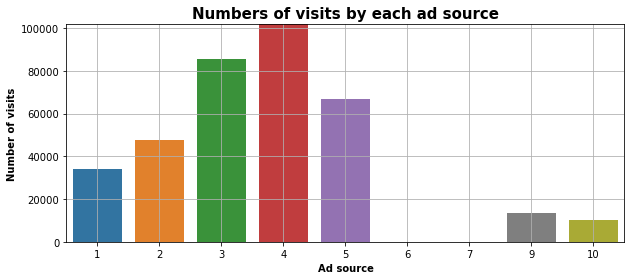

In [22]:
#Plotting a graph   
fig, ax = plt.subplots(figsize=(10,4))
x = sns.barplot(x = visits_pivot.source_id, y = visits_pivot.uid)
x.set_title('Numbers of visits by each ad source', fontdict={'size':15}, fontweight ='bold')
x.set_xlabel('Ad source', 
               fontweight ='bold')
x.set_ylabel('Number of visits', 
               fontweight ='bold')
x.grid(True)
x.set_ylim(0, 101794)

plt.show()

Let's take a look again at the numbers of visits by each ad source<br>

In [23]:
visits['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

We see that the differents between the numbers of visits between diferents ad sources is so dramatic that we can't see in the graph the bars for the ad sources 7 and 6. This it's something important to take in consideration! 
<br> 
* **Ad source Id 9 and 10** : Yandex.Afisha is paying for them but they almost no generate visits in comparasion to the rest.
* **Ad source Id 6 and 7** : They are organic! Organic traffic refers to the visitors that come to our website as the result of unpaid (or “organic”) search results. The opposite of paid traffic, organic traffic is not generated by paid ads or other efforts to bring in site visitors. For example, 7 can be the users that actually write the address of the website, and 6 the unpaid results that appear on a search engine results page after a query.
* **Ad source Id 1,2,3,4 and 5** : Most of the visitors interact with Yandex.Afisha due this ad sources.

**How many users visited Yandex.Afisha?**

In [24]:
visits['uid'].value_counts().count()

228169

228169 users visited Yandex.Afisha, doing a total of 359400 visits.

In [25]:
print(((359400-228169)*100)/359400)

36.513912075681695


36.51% of the visits are from users that came back for more!

#  Adding  columns to our tables 

### User Sessions : visits['session_duration_sec'] 
We know how many users visit Yandex.Afisha, but it would be great to have data on how much time they spend on it. Here the concept of user sessions will help. A user session is the set of user actions starting with the opening of the app/website and ending when it's closed.<br> 
<br> 
**Let's calculate the length of all sessions!**

In [26]:
#Adding a new column to the visits table with the duration of each session
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
#Let's take a look at how the visits table looks like now.
visits.head()

,device,end_ts,source_id,start_ts,uid,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0


**What it's the average session length(ASL)?** 
We want to know the amount of time users spend in Yandex.Afisha in the average session. 
Let's find the ASL by calculating the length of all sessions and finding the mean:

In [27]:
print(visits['session_duration_sec'].mean()) 

643.506488592098


Looks good. But let's have a look at the distribution:

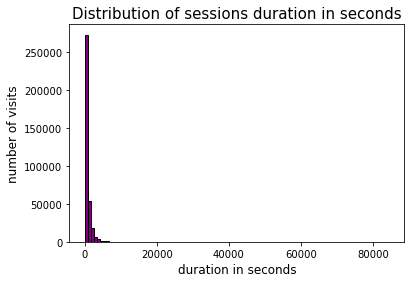

'max=84480,min=0,median=300.0,mean=643.506488592098,mode=60'

In [28]:
max_duration_session = visits['session_duration_sec'].max()

# matplotlib histogram for session_duration_sec column in visits table
plt.hist(visits['session_duration_sec'], color = 'purple', edgecolor = 'black', bins =100, range=(0,max_duration_session))        
plt.title('Distribution of sessions duration in seconds',fontsize=15)
plt.xlabel('duration in seconds',fontsize=12) 
plt.ylabel('number of visits',fontsize=12) 
plt.show()
display('max={},min={},median={},mean={},mode={}'.format(visits['session_duration_sec'].max(),
             visits['session_duration_sec'].min(),visits['session_duration_sec'].median(),
             visits['session_duration_sec'].mean(),visits['session_duration_sec'].mode()[0]))               

When the distribution is normal or close to normal, we can take the mean or median. But in our case it's impossible, so we have to calculate the mode (The most popular session duration):

In [29]:
print(visits['session_duration_sec'].mode()) 

0    60
dtype: int64


**Which session duration is the most popular one?**<br>
60 seconds! One minute!<br>
Is a minute enough time to take a quick look at the site and place an order? Maybe it's just enough time to place an order.

* **ASL** : The average amount of time a visitor spends on Yandex.Afisha is 60 seconds.
* **Do we have zero duration sessions / dramatically short sessions?**<br> 
We must check the matter.

**Let's take a look at the values counts in the session_duration_sec column**

In [30]:
visits['session_duration_sec'].value_counts()

60       53029
0        35794
120      35748
180      26672
240      21085
         ...  
17820        1
18480        1
14340        1
23400        1
16320        1
Name: session_duration_sec, Length: 312, dtype: int64

**We have 35794 visits to Yandex.Afisha with a session duration of zero seconds**
<br> 
**Let's see how it's look in percentage!** 

In [31]:
#The most popular session's duration and their percents, popular for appearing the most in the data set
visits.stb.freq(['session_duration_sec'],style=True,cum_cols=False, thresh=55)

,session_duration_sec,count,percent
0,60.000000,"53,029",14.75%
1,0.000000,"35,794",9.96%
2,120.000000,"35,748",9.95%
3,180.000000,"26,672",7.42%
4,240.000000,"21,085",5.87%
5,300.000000,"17,005",4.73%
6,others,"170,067",47.32%


*The Big Picture Thus Far:*
* 312 differents sessions length!
* Most visits last around one minute and represent 14.75% of total visits, while the median is 240 seconds. The numbers make sense as customers looking for shows can see the schedule in one minute, and also maybe users are not looking to see a specific schedule, maybe they are doing a quick visit to see what's going on in Yandex.Afisha.
* We have 35794 sessions of 0 duration. It could be explained by users clicking a link and leaving the page before it is fully loaded, for example. We are not deleting these rows. First, because there is no mistake here and second, because doesn't matter if the user stay in Yandex.Afisha for only zero second, the company is still paying for these visits (They are part of the marketing costs).
* Interesting ! The third most common session duration was two minutes, the fourth was three minutes, the fifth was 4, and the sixth was six minutes. It seems that session durations lengths become less common as they get longer.
* There were some very large outliers in our data for the duration of sessions (12 hour sessions, for example), as well as some sessions with negative duration, which might indicate an error in the data collection or conversion process.
* 58% of all sessions last between 0 seconds and 5 minutes and remember! It seems that session durations lengths become less common as they get longer.

### Separating columns for date,year, month, and week values.
In the future we will want  to calculate weekly and monthly activity in Yandex.Afisha.

In [32]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits.start_ts.astype('datetime64[M]')
visits['session_week']  = visits.start_ts.astype('datetime64[W]')
visits['session_date'] = visits.start_ts.astype('datetime64[D]')
display(visits.head()) 

,device,end_ts,source_id,start_ts,uid,session_duration_sec,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017,2017-12-01,2017-12-21,2017-12-27


# Making reports and calculating

## Product<br> 
**How many people open the Yandex.Afisha app/web site, and why don't all of them buy tickets?
We'll answer the second question a little later. <br> 
First, let's explore user activity. We want to know how Yandex.Afisha users interact with the service, and how they do it.** 
<br> 

### How many people use Yandex.Afisha every day, week, and month?<br>
**We will calculate the three main metrics that describe the number of active users:<br>**
**DAU — the number of daily active (unique) users<br>
WAU — the number of weekly active unique) users<br>
MAU — the number of monthly active unique) users<br>**


DAU/MAU/WAU should be compared over time. So it's better to build a graph that will show the dynamics of these metrics. Something like a line graph for DAU and bar graph for MAU will be ok.

#### Number of daily active (unique) users - DAU 

In [33]:
#We'll group the data by session date(days),using groupby method and calculating unique users per day
dau = visits.groupby('session_date').agg({'uid': 'nunique'}).reset_index()
#Taking a look
display(dau.head())

,session_date,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


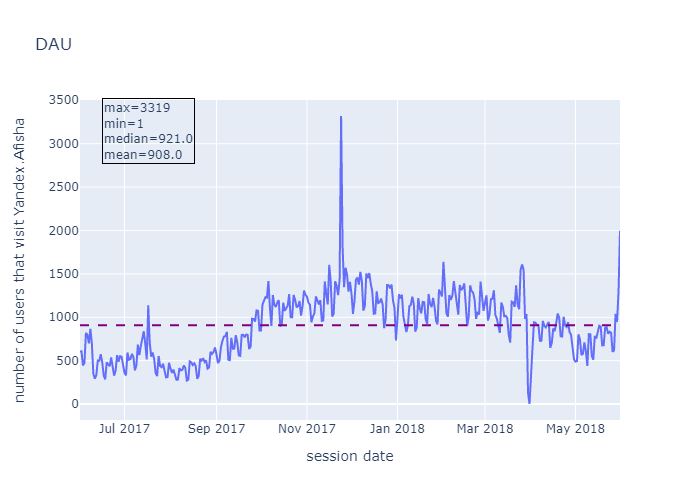

In [34]:
fig = px.line(dau,x=dau["session_date"], y=dau['uid'],title='DAU', 
              labels={
                     "session_date": "session date",
                     "uid": "number of users that visit Yandex.Afisha",
                 })
#adding reference line with average DAU over time
fig.add_hline(y=dau['uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average DAU",
             annotation_position="top left")
fig.update_layout(showlegend=True,
                  annotations=[
                      go.layout.Annotation(
                          text='max={}<br>min={}<br>median={}<br>mean={:.1f}'.format(dau['uid'].max(),
                                dau['uid'].min(),dau['uid'].median(),dau['uid'].mean()),
                          align = 'left',
                          xref='paper',
                          yref='paper',
                          x=0.04,
                          y=0.8,
                          bordercolor= 'black'  
                      )
                  ] )
fig.show("png")  

*  Nov 24, 2017 was a good day for Yandex.Afisha, a lot of users used the service! 3319 diferrents users! while the mean is 908. Maybe there were discounts that day, or there was an important event that everyone wanted to attend? Yes! Black friday! In Nov 24, 2017 it’s Black Friday in the US; the time of great deals and discounts. And in order, to sell more goods and merchandise, Russia adopted the holiday as well. 
* Mar 31,2018 was a really bad day for Yandex.Afisha, only one user visited us! Why? Maybe the marketing team was busy that day? Maybe the app or website did not work correctly?

#### The number of weekly active users - WAU 

In [35]:
#We'll group the data by session weeks,using groupby method and calculating unique users per week
wau=visits.groupby(['session_week'])['uid'].nunique().reset_index()
#Taking a look
display(wau.head()) 

,session_week,uid
0,2017-06-01,4082
1,2017-06-08,3311
2,2017-06-15,2844
3,2017-06-22,3079
4,2017-06-29,3055


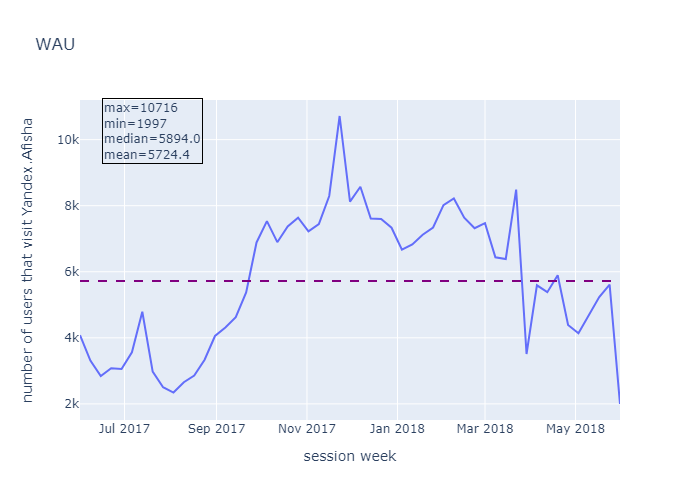

In [36]:
fig = px.line(wau,wau["session_week"], y=wau['uid'],title='WAU', 
              labels={
                     "session_week": "session week",
                     "uid": "number of users that visit Yandex.Afisha",
                 })
#adding reference line with average DAU over time
fig.add_hline(y=wau['uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average WAU",
             annotation_position="top left")
fig.update_layout(showlegend=True,
                  annotations=[
                      go.layout.Annotation(
                          text='max={}<br>min={}<br>median={}<br>mean={:.1f}'.format(wau['uid'].max(),
                                wau['uid'].min(),wau['uid'].median(),wau['uid'].mean()),
                          align = 'left',
                          xref='paper',
                          yref='paper',
                          x=0.04,
                          y=0.8,
                          bordercolor= 'black'  
                      )
                  ] )
fig.show("png") 

* The week that start in Nov 23, 2017 was the week with the greater number of users that visited Yandex.Afisha. This it's logical, because these week is also the week of black friday!
* What about Aug 3,2017? This is new! We can see that this week was no so good also.

#### The number of monthly active users - MAU 

In [37]:
#We'll group the data by session month,using groupby method and calculating unique users per month
mau=visits.groupby(visits['session_month'])['uid'].nunique().reset_index()
#Taking a look
display(mau.head()) 

,session_month,uid
0,2017-06-01,13259
1,2017-07-01,14183
2,2017-08-01,11631
3,2017-09-01,18975
4,2017-10-01,29692


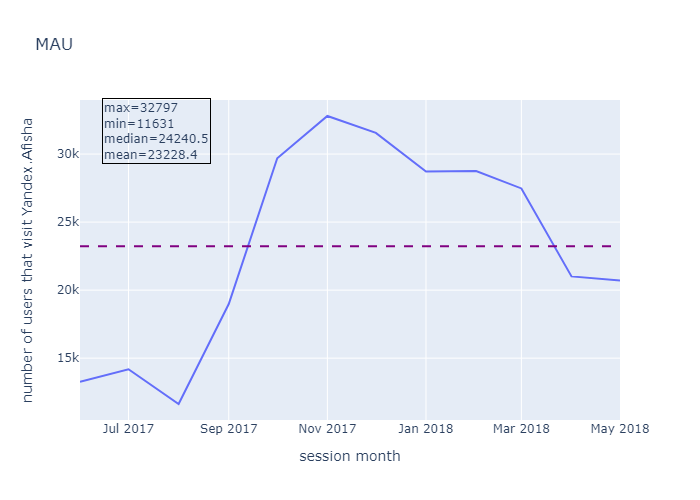

In [38]:
fig = px.line(mau,x=mau["session_month"], y=mau["uid"],title='MAU', 
              labels={
                     "session_month": "session month",
                     "uid": "number of users that visit Yandex.Afisha",
                 })
#adding reference line with average MAU over time
fig.add_hline(y=mau['uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average MAU",
             annotation_position="top left")
fig.update_layout(showlegend=True,
                  annotations=[
                      go.layout.Annotation(
                          text='max={}<br>min={}<br>median={}<br>mean={:.1f}'.format(mau['uid'].max(),
                                mau['uid'].min(),mau['uid'].median(),mau['uid'].mean()),
                          align = 'left',
                          xref='paper',
                          yref='paper',
                          x=0.04,
                          y=0.8,
                          bordercolor= 'black'  
                      )
                  ] )
fig.show("png")  

* The month of August in the year 2027 was clearly a month with few interactions. But as of this month the number of users who use Yandex.Afisha grows and grows. Then we come to November 2017, and from this date our numbers get smaller. In other words, Yandex.Afisha receives more users visits in the winter months than in the summer months. Interesting! We weren't expecting this.

### How many sessions are there per day? 
Remember: one user might have more than one session.

In [39]:
#using count() on user_id to calculate the number of sessions
sessions_per_day =visits.groupby(visits['session_date'])['uid'].count().reset_index()
sessions_per_day.columns = ['session_date', 'sessions_per_day']
#Taking a look
display(sessions_per_day.head())


,session_date,sessions_per_day
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893


**Let's take a look at the statistic summary and plot a distribution graph**

In [40]:
#show statistic summary for sessions_per_day['sessions_per_day'] column
sessions_per_day['sessions_per_day'].describe()

count     364.000000
mean      987.362637
std       418.994796
min         1.000000
25%       635.500000
50%      1003.000000
75%      1280.000000
max      4042.000000
Name: sessions_per_day, dtype: float64

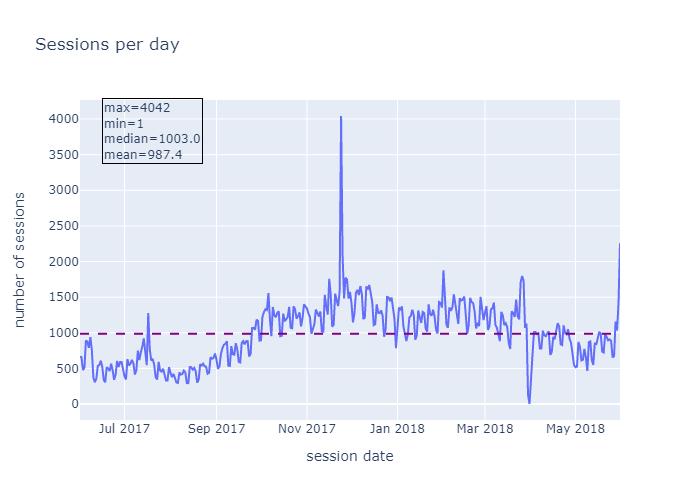

In [41]:
fig = px.line(sessions_per_day,x="session_date", y="sessions_per_day",title='Sessions per day', 
              labels={
                     "session_date": "session date",
                     'sessions_per_day': "number of sessions",
                 })
#adding reference line with number of sessions average per day
fig.add_hline(y=sessions_per_day['sessions_per_day'].mean(),line_dash="dash", line_color="purple", annotation_text="average number of sessions",
             annotation_position="top left")
fig.update_layout(showlegend=True,
                  annotations=[
                      go.layout.Annotation(
                          text='max={}<br>min={}<br>median={}<br>mean={:.1f}'.format(sessions_per_day['sessions_per_day'].max(),
                                sessions_per_day['sessions_per_day'].min(),sessions_per_day['sessions_per_day'].median(),sessions_per_day['sessions_per_day'].mean()),
                          align = 'left',
                          xref='paper',
                          yref='paper',
                          x=0.04,
                          y=0.8,
                          bordercolor= 'black'  
                      )
                  ] )
fig.show("png")  

*The Big Picture Thus Far:*
* In 364 days (one year!) Yandex.Afisha had 359,400 visits. 
* Yandex.Afisha had an average of 987 visits per day.
* Actually, 75% of the days Yandex.Afisha had an average of 1280 visits per day.
* In the graph we can see that there were a few days during the year where the visits were vastly greater than in the rest of the year. 
* The average number of visits per day is 364 and the maximum number of visits per day is 4042, a huge difference! 

**Finding the average number of sessions per user (by day)**

In [42]:
sessions_per_day['number_users_per_day']=dau['uid']
sessions_per_day['average_sessions_per_user']=sessions_per_day['sessions_per_day']/sessions_per_day['number_users_per_day']
sessions_per_day.head()

,session_date,sessions_per_day,number_users_per_day,average_sessions_per_user
0,2017-06-01,664,605,1.097521
1,2017-06-02,658,608,1.082237
2,2017-06-03,477,445,1.071910
3,2017-06-04,510,476,1.071429
4,2017-06-05,893,820,1.089024


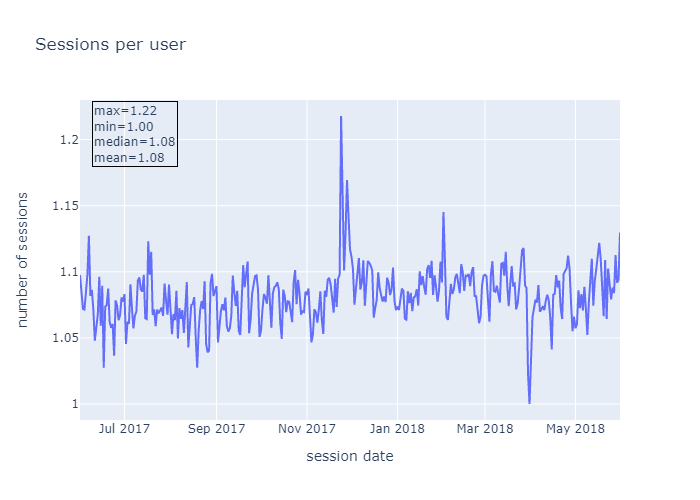

In [43]:
#let's plot sessions per user
fig = px.line(sessions_per_day,
              x="session_date", y="average_sessions_per_user",title='Sessions per user',
                labels={
                     "session_date": "session date",
                     'average_sessions_per_user': "number of sessions",
                 })
fig.update_layout(showlegend=True,
                  annotations=[
                      go.layout.Annotation(
                          text='max={:.2f}<br>min={:.2f}<br>median={:.2f}<br>mean={:.2f}'.format(sessions_per_day['average_sessions_per_user'].max(),
                                sessions_per_day['average_sessions_per_user'].min(),sessions_per_day['average_sessions_per_user'].median(),sessions_per_day['average_sessions_per_user'].mean()),
                          align = 'left',
                          xref='paper',
                          yref='paper',
                          x=0.12,
                          y=0.8,
                          bordercolor= 'black'  
                      )
                  ] )
fig.show("png")  

**Look at the graph and metrics! <br>
The conclusion is obvious! If someone visits Yandex.Afisha then it will be enough for him to enter the app or website only once during the same day (approximately). This information is extremely important! Many services prefers their users to use the app or website as many times as possible during the day (for example: facebook). <br>
Why? Because by increasing user traffic, the possibility of increasing income grows. Obviously, this depends on the service we are offering. In the case of Facebook, the revenue comes from advertising. For this reason they want users to use the services for as long as possible, but also! They don't want us to visit facebook for long times every time. It is better if users make many visits with short duration, in this way they consume a lot of time using faceboook without knowing it.<br>
<br>
What was explained above also includes Yandex.Afisha? <br> 
Yandex.Afisha makes money from the tickets to the events it sells. Therefore, we are not interested in our users spending a lot of time on Yandex.Afisha. It's well know that the more time pass, the more the desire to buy the product goes down. In addition, if someone want to buy a ticket and has to visit Yandex.Afisha several times for this, this could mean that there are problems with our services. <br>
<br>
How does it look to us? 
 <br>
We already know that users spend an average of 60 seconds on Yandex.Afisha. Now everything makes sense! If someone wants to buy a ticket the user needs to visit Yandex.Afisha once to do this and 1 minute will be more than enough!**

**Visualize sessions per day per user and DAU together** <br>
Let's compare the dynamics of total sessions per day to the dynamics of DAU from the previous question.

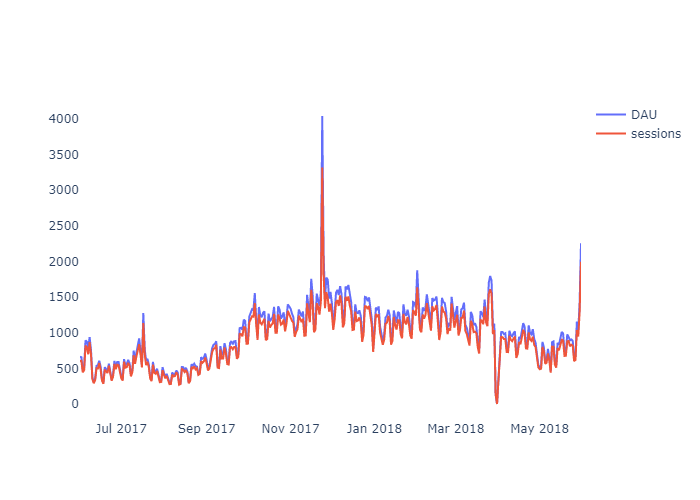

In [44]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=sessions_per_day['session_date'], 
                        y=sessions_per_day['sessions_per_day'],
                    mode='lines',
                    name='DAU'))

fig.add_trace(go.Scatter(x=sessions_per_day['session_date'], 
                        y=sessions_per_day['number_users_per_day'],         
                    mode='lines',
                    name='sessions',))
fig.update_layout(
    showlegend=True,
    plot_bgcolor="white"
)
fig.show("png")  

* exactly what we thought! We can see in the graph how the DAU and the number of visits per day are very close to each other. Good news!

### What is the length of each session?<br>
We already know this: The average time a visitor spends on Yandex.Afisha is 60 seconds! To see more details about this calculations and their conclusions it's posible to look above at **4.0.1 User Sessions : visits['session_duration_sec']**

### How often do users come back?
**We're clearly talking about retention : How many users stay loyal to Yandex.Afisha? <br>
Really important question! We want our customers to come back and buy more tickets!**
<br>
<br>
Retention will shows us how many users (in % out of registered) were active (had sessions) on a certain month after registration/first visit. <br>
Basically, for retention we need to find the differnce between any session and first session. Let's start!

In [45]:
#let's find the first session for each user
min_visit=visits.groupby(['uid'])['session_date'].min().reset_index()
min_visit.columns = ['uid', 'first_session']
min_visit.head()

,uid,first_session
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07
3,313578113262317,2017-09-18
4,325320750514679,2017-09-30


In [46]:
#now merging to the original dataset
visits=visits.merge(min_visit ,on=['uid'])
visits.head(2)

,device,end_ts,source_id,start_ts,uid,session_duration_sec,session_year,session_month,session_week,session_date,first_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017,2017-12-01,2017-12-14,2017-12-20,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018,2018-02-01,2018-02-15,2018-02-19,2018-02-19


**Our cohorts and age calculations will be done on monthly calculations. 
We will define two parameters:**
* **cohort:** monthly cohort - when the user registered/had first session. Basically turning his date of registration into month to understand what month he registered in, thus which cohort he belongs to.
* **age:** it's the difference between any current session and first_session, we will also calculate it in 'month' to keep all of the units on one scale). Basically age answers the question : "How long did it pass after registration till the user made this action?"

Now we'll create the cohort for each of the users.<br> 
we'll create monthly cohort as this is a reasonable time frame for our user's retention rate.

In [47]:
visits['cohort'] = visits['first_session'].astype('datetime64[M]')
visits['age'] = ((pd.to_datetime(visits['session_date']) - pd.to_datetime(visits['first_session'])) / np.timedelta64(1,'M')).round().astype('int')
visits.head(2)

,device,end_ts,source_id,start_ts,uid,session_duration_sec,session_year,session_month,session_week,session_date,first_session,cohort,age
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017,2017-12-01,2017-12-14,2017-12-20,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018,2018-02-01,2018-02-15,2018-02-19,2018-02-19,2018-02-01,0


In [48]:
#let's take a look at actions that happened on a third month, for example
visits[visits.age==3].head(3)

,device,end_ts,source_id,start_ts,uid,session_duration_sec,session_year,session_month,session_week,session_date,first_session,cohort,age
12,desktop,2017-11-19 17:44:00,3,2017-11-19 17:21:00,16007536194108375387,1380,2017,2017-11-01,2017-11-16,2017-11-19,2017-09-03,2017-09-01,3
64,desktop,2018-04-25 10:28:00,9,2018-04-25 10:28:00,7478054213403174082,0,2018,2018-04-01,2018-04-19,2018-04-25,2018-01-25,2018-01-01,3
129,desktop,2017-09-16 20:56:00,4,2017-09-16 20:56:00,8056418121947262981,0,2017,2017-09-01,2017-09-14,2017-09-16,2017-06-04,2017-06-01,3


We want to compare users behavior from different cohorts after certain period of time. <br> 
Let's find the number of active users by cohort age! using a pivot table

In [49]:
#lets see how many users were active from certain cohorts on a certain time after registration
cohorts = visits.pivot_table(index='cohort',
                  columns='age',
                  values='uid',
                  aggfunc='nunique').fillna(0)

cohorts

age,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2017-06-01,13259.0,976.0,718.0,805.0,910.0,891.0,844.0,743.0,738.0,666.0,547.0,534.0,167.0
2017-07-01,13140.0,739.0,688.0,699.0,738.0,648.0,587.0,653.0,483.0,389.0,315.0,72.0,0.0
2017-08-01,10181.0,702.0,633.0,598.0,517.0,436.0,418.0,350.0,295.0,238.0,29.0,0.0,0.0
2017-09-01,16704.0,1264.0,1124.0,817.0,660.0,672.0,552.0,436.0,331.0,43.0,0.0,0.0,0.0
2017-10-01,25977.0,1899.0,1376.0,987.0,938.0,815.0,548.0,467.0,84.0,0.0,0.0,0.0,0.0
2017-11-01,27248.0,1873.0,1276.0,1043.0,854.0,660.0,504.0,75.0,0.0,0.0,0.0,0.0,0.0
2017-12-01,25268.0,1288.0,1038.0,731.0,545.0,414.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,22624.0,1209.0,821.0,578.0,388.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-01,22197.0,1063.0,596.0,400.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We must keep in mind that retention is a % of those who returned from those who registered. Column age=0 includes all of the users that registered in a cohort, thus, to calculate Retention in % we divide columns for all ages by column when age=0. 

In [50]:
retention=cohorts.iloc[:,0:].div(cohorts[0], axis=0)
retention

age,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2017-06-01,1.0,0.073610,0.054152,0.060713,0.068633,0.067200,0.063655,0.056037,0.055660,0.050230,0.041255,0.040275,0.012595
2017-07-01,1.0,0.056240,0.052359,0.053196,0.056164,0.049315,0.044673,0.049696,0.036758,0.029604,0.023973,0.005479,0.000000
2017-08-01,1.0,0.068952,0.062175,0.058737,0.050781,0.042825,0.041057,0.034378,0.028976,0.023377,0.002848,0.000000,0.000000
2017-09-01,1.0,0.075670,0.067289,0.048910,0.039511,0.040230,0.033046,0.026102,0.019816,0.002574,0.000000,0.000000,0.000000
2017-10-01,1.0,0.073103,0.052970,0.037995,0.036109,0.031374,0.021096,0.017977,0.003234,0.000000,0.000000,0.000000,0.000000
2017-11-01,1.0,0.068739,0.046829,0.038278,0.031342,0.024222,0.018497,0.002752,0.000000,0.000000,0.000000,0.000000,0.000000
2017-12-01,1.0,0.050974,0.041080,0.028930,0.021569,0.016384,0.002770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-01,1.0,0.053439,0.036289,0.025548,0.017150,0.001945,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02-01,1.0,0.047889,0.026850,0.018020,0.002027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**Now let's visualize it!** 

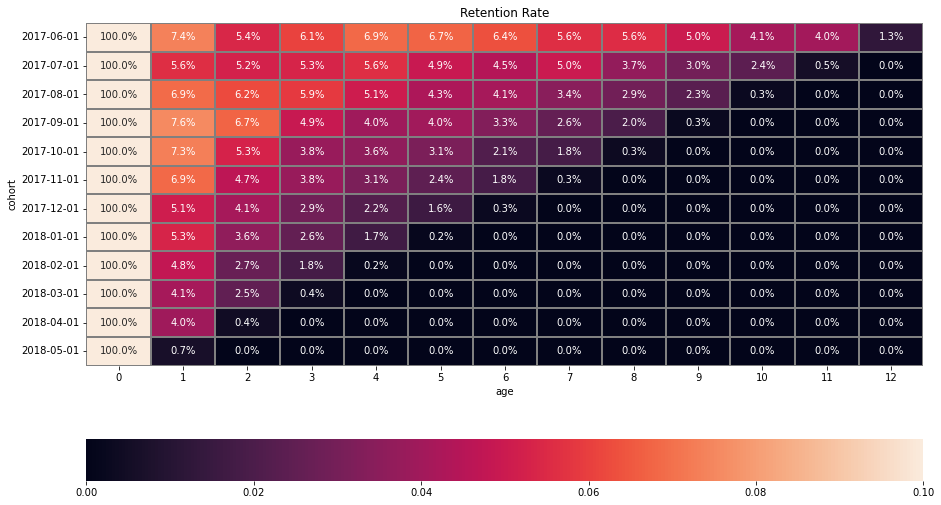

In [51]:
# the first line just formats cohort into a str for a nicer output
retention.index=retention.index.astype(str)
plt.figure(figsize=(15,9))
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey',  vmax=0.1, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title='Retention Rate')
plt.show()

* We can appreciate that the cohort for 2017-06-01 was a really good one in terms on retention. Also the cohort for 2017-07-01!
* **08 and 09-2017 are leading with a retention rate above 6,5% in our second month.**
* **After the third month, users of the first cohort started to become more active and remained on top through the rest of the cohort analysis.**
* We can see that for 10-2017 and 11-2017 cohorts, altough they had very good retention rates on the 1st month, by the 6th we only have around 2%.

### Product : What do we take with us? 
* User Metrics
    * We looked at unique user activity for daily, weekly and monthly time periods.
    * The trend of all activity periods is similar. 
    * We can see that at the end of 2017 and the beginning of 2018 we have higher usage of the platform.
    * Were as around the summer time of both 2017 and 2018 (up to September 2017 and after April 2018) we see less activity.
* User sessions
    * The number of sessions per user is around 1 to 1.2, the trend follow the daily activity of these users, so there is no significant difference between unique user activity and user sessions. Perfect! Users should be available to buy the ticket in one visit.
    * The most frequent session duration is 60 seconds, and this are good news for us! 
    * There were some very large outliers in our data for the duration of sessions, as well as some sessions with negative duration, which might indicate an error in the data collection or conversion process.
    * We have 36,00 sessions of 0 duration (around 10%)
* User Retention
    * We've studied the difference in users retention for different cohorts on a monthly basis.
    * We can see that in the first month after registration we have less than 8% of active users across the board.
    * Following are our top cohorts in terms of retention for the first month:
      * 09-2017, 7.6%
      * 06-2017, 7.4%
      * 10-2017, 7.3%
      * 11-2017, 6.9%
      * 08-2017, 6.9%
    * The 08 and 09-2017 are leading with a retention rate above 6% in our second month.
    * After the third month, users of the first cohort started to become more active and remained on top through the rest of the cohort analysis.
    * We can see that for 10-2017 and 11-2017 cohorts, although they had very good retention rates in the 1st month, by the 6th we only had around 2%.

## Sales

### When do people start buying?

We're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, this is to be good for us. If the first purchase happens the next day, it's less good.  <br>**Remember:the longer it takes to make the purchase, the more the desire to make the purchase will decrease!**

For us to know when a customer becomes a customer, or in other words, when an individual makes their first purchase, we need to know when the user makes their first purchase and subtract it from the date when the user first visits the platform.

Since we observed at the beginning of our study that the minimum revenue in orders data is 0, it means that some transactions maybe have not been completed.<br>
Let's count how many rows we have, maybe we should create a new dataframe for completed purchases.

In [52]:
print('The number of incomplete orders is:',
orders.query('revenue == 0')['uid'].nunique())

The number of incomplete orders is: 23


No big deal! We are still using our data frame like it's. Why? because the 23 orders is no a big number, and maybe we are talking here about customers with a discount of 100%! And also if it's for free it's still a sale for Yandex.Afisha

In [53]:
#for each user let's find the time of first order
first_order = orders.groupby(['uid'])['buy_ts'].min().reset_index()
first_order.columns = ['uid', 'first_purchase']
first_order.head()

,uid,first_purchase
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [54]:
#merging the visits table and first_order table 
visits=visits.merge(first_order, how='left',on=['uid'])
display(visits.head(5))

,device,end_ts,source_id,start_ts,uid,session_duration_sec,session_year,session_month,session_week,session_date,first_session,cohort,age,first_purchase
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017,2017-12-01,2017-12-14,2017-12-20,2017-12-20,2017-12-01,0,NaT
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018,2018-02-01,2018-02-15,2018-02-19,2018-02-19,2018-02-01,0,NaT
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017,2017-07-01,2017-06-29,2017-07-01,2017-07-01,2017-07-01,0,NaT
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018,2018-05-01,2018-05-17,2018-05-20,2018-03-09,2018-03-01,2,2018-03-09 20:25:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,1680,2018,2018-03-01,2018-03-08,2018-03-09,2018-03-09,2018-03-01,0,2018-03-09 20:25:00


**NOTE** :
* The rows with NaT values in the but_ts column is because not all users visiting Yandex.Afisha bought tickets 

**Let's calculate average conversion time and plot it**

In [55]:
visits_conversion = visits[~visits['first_purchase'].isna() & (visits['first_purchase'] > visits['first_session'])]
visits_conversion.head(3)

,device,end_ts,source_id,start_ts,uid,session_duration_sec,session_year,session_month,session_week,session_date,first_session,cohort,age,first_purchase
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018,2018-05-01,2018-05-17,2018-05-20,2018-03-09,2018-03-01,2,2018-03-09 20:25:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,1680,2018,2018-03-01,2018-03-08,2018-03-09,2018-03-09,2018-03-01,0,2018-03-09 20:25:00
6,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,60,2017,2017-09-01,2017-08-31,2017-09-03,2017-09-03,2017-09-01,0,2017-09-04 12:46:00


In [56]:
#creating a pivot table 
visits_conversion = visits_conversion.pivot_table(index = ['uid'], values=['first_purchase','first_session'], aggfunc='min')
#using resent_index()
visits_conversion.reset_index(inplace=True)
#Let's take a look                                       
visits_conversion.head()

,uid,first_purchase,first_session
0,313578113262317,2018-01-03 21:51:00,2017-09-18
1,1575281904278712,2017-06-03 10:13:00,2017-06-03
2,2429014661409475,2017-10-11 18:33:00,2017-10-11
3,2464366381792757,2018-01-28 15:54:00,2018-01-27
4,2551852515556206,2017-11-24 10:14:00,2017-11-24


In [57]:
visits_conversion['conversion']=((pd.to_datetime(visits_conversion['first_purchase'])-pd.to_datetime(visits_conversion['first_session']))/np.timedelta64(1,'D')).astype('int')
display(visits_conversion.head(5))

,uid,first_purchase,first_session,conversion
0,313578113262317,2018-01-03 21:51:00,2017-09-18,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,0
3,2464366381792757,2018-01-28 15:54:00,2018-01-27,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,0


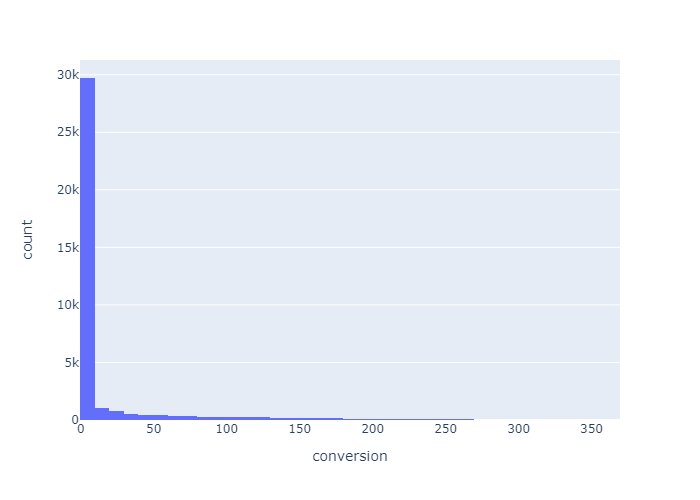

In [58]:
fig = px.histogram(visits_conversion, x="conversion",nbins=50)
fig.show("png") 

**Okay! Looks like most users buy their first ticket the day they visit Yandex.Afisha for the first time!** 
Let's take a closer look at this numbers! 

In [59]:
#The most popular convertion rates and their percents, popular for appearing the most in the data set
visits_conversion.stb.freq(['conversion'],style=True,cum_cols=False, thresh=80)

,conversion,count,percent
0,0.000000,"25,038",68.56%
1,1.000000,"1,966",5.38%
2,2.000000,685,1.88%
3,3.000000,452,1.24%
4,4.000000,386,1.06%
5,5.000000,307,0.84%
6,6.000000,264,0.72%
7,others,"7,424",20.33%


**Great! Now let's calculate the average conversion!**

In [60]:
visits_conversion['conversion'].median()

0.0

**So, on average it takes 0 days to convert our users to buyers. But how many users are converted at all?**

In [61]:
print(' The overall conversion is {:.1%}'.format(len(visits_conversion)/(visits['uid'].nunique())))

 The overall conversion is 16.0%


*The Big Picture Thus Far:*
* We have an overall conversion rate of 16%! These means that 16% od the users that visits Yandex.Afisa makes a purchase in the end. No bad, but not fantastic!
* The majority of our customers (35,265) make their first purchase within the first 2 days (day 0 - 1) they visited us, that's great!
* The median for time of purchase is 0.
* In addition, we can see that after 10 days most users who didn't purchase in the first 2 days will do so.
* After 10 days purchases can be considered as outliers.
* The longest time to purchase from our data is 363 days (! ), I wonder who would wait that long.
* 68.56% of our users made their first purchase the first day they visited. Good news!

###  How many orders do they make during a given period of time? 

**We'll take a closer look at how many orders there are compared to number of customers per cohort.<br>
We will also analyze the cohort against itself over time.**

Let's also use the concept of cohort analysis here, just we will do it for purchases per user.  Remember how we defined cohort in retention as first session? From now on we will work with **first purhase** as the cohort, since we care about reoccuring purchases, not visits. <br>
Further on in LTV, CAC and ROMI calculations we will also use only info on buyers, since we care about the returns and costs on buyers.

We'll work with 'orders' and 'first_order' dataframe, as we want to look at customers as cohorts over time, but for us to do so we need to calculate and add a few columns.<br>
<br>>
**First : Let's remember how first_order looks like!**

In [62]:
first_order.head()

,uid,first_purchase
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In the first_order we see the user id and the date of his first purchase, great!<br>
**Now we will merge! We want to merge our orders table with the first_order. In this way, we will be avaible to see the date of the first purchase for every user in our orders table.**

In [63]:
orders =orders.merge(first_order, how='left',on=['uid'])
display(orders.head())

,buy_ts,revenue,uid,first_purchase
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


* We'll take the date out of 'buy_ts' and create 'order_date'.
* We'll create 'first_order_month' out of 'first_purchase' column, to group our cohorts.
* We'll create 'order_month' out of 'buy_ts' for the same purpose of grouping cohorts and calculating orders.

In [64]:
orders['order_date'] = orders['buy_ts'].astype('datetime64[D]')
orders['first_order_month'] = orders['first_purchase'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
display(orders.head())

,buy_ts,revenue,uid,first_purchase,order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01


Just for curiosity, let's take a look at the unique values for the uid column, using value_counts() method.

In [65]:
orders['uid'].value_counts()

3644482766749211722     239
13888745432979765063    238
11920452646463905188    227
6731421022966725351     183
5139615590553126732     150
                       ... 
1039442909910620438       1
42362552951081637         1
8069118931487899422       1
17649287249444736221      1
83872787173869366         1
Name: uid, Length: 36523, dtype: int64

We are getting closer! Now we'll calculate the cohorts sizes.

In [66]:
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'cohort_size']
cohort_sizes.head()

,first_order_month,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


* Now, we'll group the cohorts and calculate the number of orders.
* We'll merge our data with 'cohort_sizes'.
* We'll calculate the age of the cohort ('age_month') for each order_month.
* Then, we'll calculate the number of orders per buyer.

In [67]:
cohort_buyers = orders.groupby(['first_order_month', 'order_month'])['revenue'].count().reset_index()
cohort_buyers.columns = ['first_order_month', 'order_month', 'number_of_orders']
cohort_buyers = cohort_buyers.merge(cohort_sizes, on=['first_order_month'])
cohort_buyers['age_month'] = ((cohort_buyers['order_month'] - cohort_buyers['first_order_month']) / np.timedelta64(1,'M')).round().astype('int32')
cohort_buyers['orders_per_buyer'] = cohort_buyers['number_of_orders'] / cohort_buyers['cohort_size']
cohort_buyers.head()

,first_order_month,order_month,number_of_orders,cohort_size,age_month,orders_per_buyer
0,2017-06-01,2017-06-01,2354,2023,0,1.163618
1,2017-06-01,2017-07-01,177,2023,1,0.087494
2,2017-06-01,2017-08-01,174,2023,2,0.086011
3,2017-06-01,2017-09-01,226,2023,3,0.111715
4,2017-06-01,2017-10-01,292,2023,4,0.144340


**We'll create a pivot table to calculate the number of orders over time of each cohort**

In [68]:
cohort_buyers_piv = cohort_buyers.pivot_table(index='first_order_month',
                                              columns='age_month',
                                              values='orders_per_buyer',
                                              aggfunc='sum'
                                             )#.cumsum(axis=1)
cohort_buyers_piv.fillna(' ')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.163618,0.087494,0.086011,0.111715,0.14434,0.107761,0.136431,0.086011,0.104795,0.07563,0.047454,0.042511
2017-07-01,1.136765,0.052002,0.062402,0.054082,0.037441,0.042642,0.031721,0.026001,0.030161,0.01248,0.027561,
2017-08-01,1.118978,0.078832,0.072993,0.059124,0.062044,0.045255,0.035766,0.056934,0.033577,0.033577,,
2017-09-01,1.136381,0.084851,0.062379,0.063541,0.025959,0.042232,0.041844,0.021697,0.023634,,,
2017-10-01,1.143779,0.07235,0.037327,0.028111,0.029724,0.023733,0.019816,0.028802,,,,
2017-11-01,1.179368,0.09728,0.044597,0.051703,0.033325,0.014457,0.024994,,,,,
2017-12-01,1.152635,0.061602,0.046087,0.04084,0.019621,0.023956,,,,,,
2018-01-01,1.121554,0.06641,0.047139,0.018974,0.023125,,,,,,,
2018-02-01,1.121611,0.060805,0.022733,0.019173,,,,,,,,


Amazing, but we will better to use a heatmap. <br>
**Let's make some visualizations!**

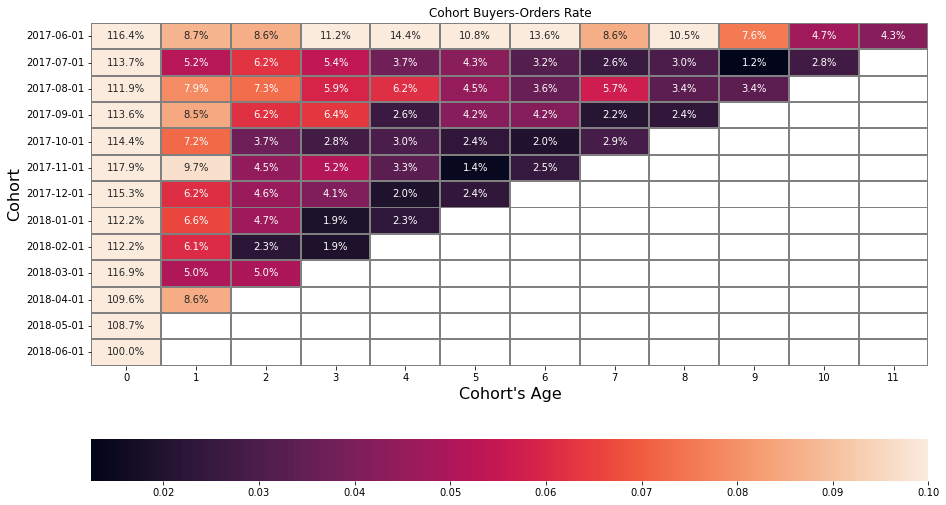

In [69]:
# the first line just formats cohort into a str for a nicer output
cohort_buyers_piv.index=cohort_buyers_piv.index.astype(str)
plt.figure(figsize=(15,9))
sns.heatmap(cohort_buyers_piv, annot=True, fmt='.1%', linewidths=1, linecolor='grey',  vmax=0.1, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title='Cohort Buyers-Orders Rate')
plt.xlabel( "Cohort's Age" , size = 16 )
plt.ylabel( "Cohort" , size = 16 )
plt.show()

**We'll create another pivot table to calculate the cumulative number of orders over time of each cohort.**

In [70]:
cohort_buyers_piv_cumsum = cohort_buyers.pivot_table(index='first_order_month',
                                              columns='age_month',
                                              values='orders_per_buyer',
                                              aggfunc='sum'
                                             ).cumsum(axis=1)
cohort_buyers_piv_cumsum.fillna(' ')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.163618,1.251112,1.337123,1.448838,1.593178,1.700939,1.83737,1.923381,2.028176,2.103806,2.151261,2.193772
2017-07-01,1.136765,1.188768,1.25117,1.305252,1.342694,1.385335,1.417057,1.443058,1.473219,1.485699,1.513261,
2017-08-01,1.118978,1.19781,1.270803,1.329927,1.391971,1.437226,1.472993,1.529927,1.563504,1.59708,,
2017-09-01,1.136381,1.221232,1.283611,1.347152,1.373111,1.415343,1.457187,1.478884,1.502518,,,
2017-10-01,1.143779,1.216129,1.253456,1.281567,1.31129,1.335023,1.354839,1.383641,,,,
2017-11-01,1.179368,1.276648,1.321245,1.372948,1.406273,1.42073,1.445724,,,,,
2017-12-01,1.152635,1.214237,1.260324,1.301164,1.320785,1.344741,,,,,,
2018-01-01,1.121554,1.187963,1.235102,1.254076,1.277201,,,,,,,
2018-02-01,1.121611,1.182416,1.205149,1.224322,,,,,,,,


*The Big Picture Thus Far:*:
* On age 0 of the cohort, customers buy more than once
* We see a generally drastic decline in orders over time, with some months that are better than the previous ones.
* The best cohort in terms of orders is 06-2017, followed by 08-2017.
* The 06-2017 cohort had some great months up until 02-2018, when orders declined.
* The best cohort for the first month is 11-2017.
* We can see that generally around holidays the number of orders increases, for example in December  (Christmas in Russia). We see an increase in orders for the 11-2017 cohort after 1 month, we see it again in 06-2017 cohort at age 6; although not all cohorts respond to this pattern, it is generally there.
* Our users don't buy more than two tickets! For the cohort of 2017-06-01 we have an acumulative number of orders of 2.193772. This cohort is the one with the higher cumulative number of orders by user, and it's the longest cohort!. This means that each user that bought a ticket in Yandex.Afisha did a maximum of 2 orders during the year! We were expecting for more!

**Remember what the question was : How many orders do they make during a given period of time? 
 <br> <br>
We will nice to calculate the average number of orders do users makes toguether during each month/cohort**
<br>
These will help us to make nice conclusions!

In [71]:
print(cohort_buyers.groupby(['order_month'])['number_of_orders'].sum())

order_month
2017-06-01    2354
2017-07-01    2363
2017-08-01    1807
2017-09-01    3387
2017-10-01    5679
2017-11-01    5659
2017-12-01    6218
2018-01-01    4721
2018-02-01    5281
2018-03-01    5326
2018-04-01    3273
2018-05-01    4346
2018-06-01       1
Name: number_of_orders, dtype: int64


**Overall average of orders do users makes each month/cohort**

In [72]:
print((cohort_buyers.groupby(['order_month'])['number_of_orders'].mean()).mean())

794.0038933288932


*The Big Picture Thus Far:*:
* We see a nice rise in sales as the year progresses 
* If more users use Yandex.Afisha the probability of get more purchases increase? We could suppose this. But, pay attention! In the MAU graph we can appreciate that sice November 2017 the number of users that use Yandex.Afisha decreased, while  the number of total orders by month increases! Interesting! These means that less users did more sales!
* The overall average of orders do users makes each month/cohort is 794, while the 2017-06 was a month with 2354 orders! Big difference!
* We will consider that we only got one purchase at 2018/06 because the data is incomplete. 

###  What is the average purchase size?

Here is the same logic (like we did before). Just instead of orders per user we're using average check. In our case revenue will be used to calculate average check. We will use our orders table, since we want to calculate the average renueve by cohort.<br>
<br>
**What exactly are we doing?**<br>
**We'll take a closer look at the average revenue compared to the number of clients per cohort.<br>
We will also analyze the cohort against itself over time.**

**But first! Let's calculate the total check for each order and plot it**

In [73]:
avg_check=orders.groupby(['uid'])['revenue'].sum().reset_index()
avg_check.head()

,uid,revenue
0,313578113262317,0.55
1,1575281904278712,3.05
2,2429014661409475,73.33
3,2464366381792757,2.44
4,2551852515556206,10.99


In [74]:
#show statistic summary for avg_check['revenue'] column
avg_check['revenue'].describe()

count    36523.000000
mean         6.901328
std         88.128535
min          0.000000
25%          1.470000
50%          3.050000
75%          5.800000
max      11810.180000
Name: revenue, dtype: float64

Looks like we have outliers!The max renueve is 11810, when the mean is around 6.9<br>
**We will make a histogram for the revenue distribution and look's whats going on!**

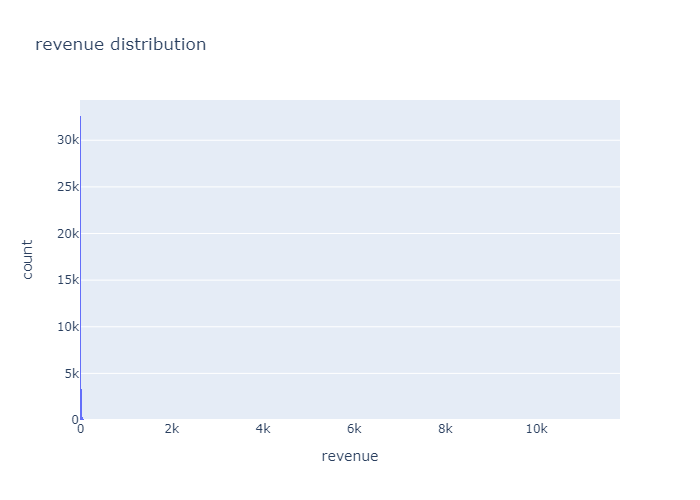

In [75]:
fig = px.histogram(avg_check, x="revenue",nbins=1000, title= 'revenue distribution')
fig.show("png")

We understand that our distribution it's obviously not normal, and also there is a big difference in the revenue between different orders. Or maybe most of the orders revenue are in the same range, and a few high-revenue orders are skewing our histogram? <br>
We have 36523 orders in our data, the mean revenue is 6.9 and for 75% of our orders the revenue is around the 5.8. <br>
**Let's check how much orders with a revenue above 200 we have and how their distribution looks like.**<br>

In [76]:
#Making a diferrent data frame with revenue values above 200
avg_check_outliers = avg_check[avg_check['revenue']>200]

In [77]:
#show statistic summary for avg_check_outliers['revenue'] column
avg_check_outliers['revenue'].describe()

count       79.000000
mean       790.904430
std       1723.817776
min        201.660000
25%        260.005000
50%        415.430000
75%        656.925000
max      11810.180000
Name: revenue, dtype: float64

Only 79 orders! That's nothing compared to the total orders of 36523. But this values are obviously skewing our histogram <br>
**Let's check the most popular revenues we have in our outliers dataframe and their percents**

In [78]:
#The most popular convertion rates and their percents, popular for appearing the most in the data set
avg_check_outliers.stb.freq(['revenue'],style=True,cum_cols=False,thresh=5 )

,revenue,count,percent
0,11810.180000,1,1.27%
1,10519.460000,1,1.27%
2,1979.330000,1,1.27%
3,others,76,96.20%


All orders are around 200 and 1900 and then boom! We have two orders with a renueve extremely high! <br>
**Let's make a new histogram for the revenue distribution, removing these values.**<br>
Why? Because we want to have some visualizations! But remember that these 79 orders that are above 200 exists! We are only doing a graph without them so that we can understand what's going on for most of our orders. 

In [79]:
avg_check_without_ourliers = avg_check.query('revenue<=200')

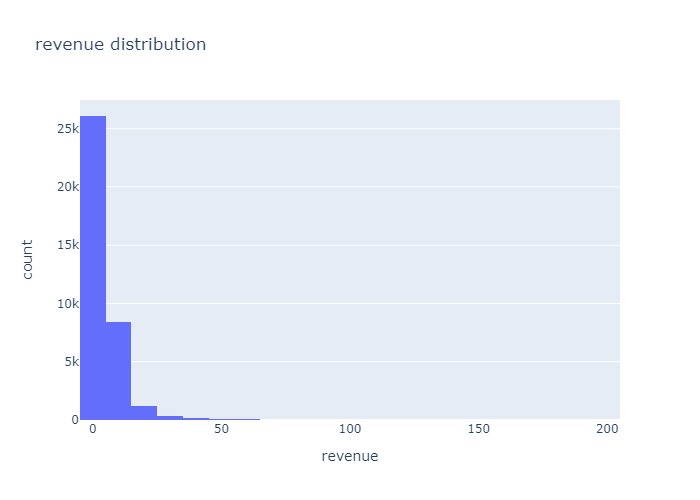

In [80]:
fig = px.histogram(avg_check_without_ourliers, x="revenue",nbins=30, title= 'revenue distribution')
fig.show("png")

**Much better!** We can see that the revenues are between 0 to 25, orders with values greater than 25 are few.

*The Big Picture Thus Far:*:
* The revenues amounts are between 0 to 25, orders with values greater than 25 are few.
* The mean revenue is 6.9 and for 75% of our orders the revenue is around the 5.8.
* We have 79 orders with a revenue above 200.
* We have two orders with a renueve extremely high!

**Cohort analysis on averge check:**<br>
Now we'll calculate the cohorts sizes.

In [81]:
avg_cohort=orders.groupby(['first_order_month','order_month'])['revenue'].mean().reset_index()
avg_cohort['age_month'] = ((avg_cohort['order_month'] - avg_cohort['first_order_month']) / np.timedelta64(1,'M')).round()
avg_cohort.head()

,first_order_month,order_month,revenue,age_month
0,2017-06-01,2017-06-01,4.060106,0.0
1,2017-06-01,2017-07-01,5.547006,1.0
2,2017-06-01,2017-08-01,5.088161,2.0
3,2017-06-01,2017-09-01,8.545575,3.0
4,2017-06-01,2017-10-01,7.084178,4.0


**We'll create a pivot table to calculate the average revenue over time of each cohort**

In [82]:
avg_cohort_piv=avg_cohort.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='revenue', 
    aggfunc='mean'
)

avg_cohort_piv.round(2).fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,4.06,5.55,5.09,8.55,7.08,6.83,6.97,6.76,5.28,8.01,12.04,6.04
2017-07-01,5.29,6.45,9.99,6.64,4.72,3.66,3.79,5.45,5.35,11.79,5.65,
2017-08-01,4.72,5.99,6.28,6.62,7.96,6.27,5.89,7.11,8.7,5.6,,
2017-09-01,4.97,13.17,8.35,62.57,15.43,15.32,16.77,11.21,7.79,,,
2017-10-01,4.37,7.41,5.13,5.59,5.1,5.07,4.28,4.01,,,,
2017-11-01,4.37,4.1,4.47,6.28,4.44,3.73,4.6,,,,,
2017-12-01,4.11,4.23,20.07,26.08,15.95,14.11,,,,,,
2018-01-01,3.69,4.44,6.45,7.52,2.71,,,,,,,
2018-02-01,3.71,4.58,3.45,3.87,,,,,,,,


**We'll create another pivot table to calculate the cumulative average renueve over time of each cohort.**

In [83]:
avg_cohort_piv_cumsum = avg_cohort.pivot_table(index='first_order_month',
                                              columns='age_month',
                                              values='revenue',
                                              aggfunc='sum'
                                             ).cumsum(axis=1)
avg_cohort_piv_cumsum.fillna(' ')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,4.060106,9.607112,14.695273,23.240848,30.325026,37.150347,44.116796,50.878636,56.157645,64.167514,76.205639,82.247732
2017-07-01,5.287123,11.733223,21.725306,28.362902,33.084708,36.74422,40.533728,45.988128,51.333818,63.123818,68.77212,
2017-08-01,4.715479,10.702794,16.983994,23.601896,31.564837,37.830159,43.720159,50.833749,59.536575,65.135053,,
2017-09-01,4.967109,18.138296,26.489352,89.059596,104.490044,119.811878,136.579008,147.785615,155.571189,,,
2017-10-01,4.374738,11.779866,16.907335,22.497581,27.596573,32.668126,36.948359,40.957479,,,,
2017-11-01,4.370717,8.474671,12.949342,19.234318,23.675789,27.402568,32.000804,,,,,
2017-12-01,4.110746,8.337487,28.410259,54.494617,70.443105,84.554153,,,,,,
2018-01-01,3.687417,8.1259,14.580868,22.105712,24.816994,,,,,,,
2018-02-01,3.706266,8.282753,11.736488,15.60363,,,,,,,,


*The Big Picture Thus Far:*:
* On age 0 of the cohort the average renueve was low for all the cohorts.
* We see a generally increase in average revenue over time, with some months that are better than the previous ones.
* The best cohort in terms of average renueve is 2017-09, followed by 2017-11, and them 2017-06.

We will nice to calculate the average renueve during each month/cohort
<br>
These will help us to make nice conclusions!

In [84]:
print(avg_cohort.groupby(['order_month'])['revenue'].mean())

order_month
2017-06-01     4.060106
2017-07-01     5.417064
2017-08-01     5.416580
2017-09-01     7.373021
2017-10-01     7.509780
2017-11-01     6.381988
2017-12-01    13.500188
2018-01-01     6.278274
2018-02-01     7.949637
2018-03-01     8.800446
2018-04-01     8.081146
2018-05-01     5.933054
2018-06-01     3.420000
Name: revenue, dtype: float64


**Overall average renueve by order each month/cohort**

In [85]:
print((avg_cohort.groupby(['order_month'])['revenue'].mean()).mean())

6.932406434995257


*The Big Picture Thus Far*:
* We see a nice rise in the average renueve by order as the year progresses, with a maximun average renueve of 13.5 in 2017-12. And then the average renueve decrease in the next months.
* We saw before that in 2017-10 we have 1135.8 orders! The highest number of orders by month. And after that month the number of orders per month decrease. But, surprise! in  2017-12 the average renueve per order is 13.500188! This means that perhaps in December Yandex.Afisha had fewer ticket orders, but the revenue from these orders was higher than in previous months. In other words, the orders were more expensive. Maybe the tickets in general were more expensive because the season  (Christmas) or maybe more tickets were bought in each order than those that are generally bought. 
* The overall average renueve by order each month is 6.9, while 2017-12 was a month with a average renueve of 13.5! Big difference!

###  How much money do they bring? (LTV)

It's essential to account for repeat purchases in analysis. To solve this problem, we'll have to calculate per-customer economics. LTV and CAC are the most important metrics in this method.<br>
<br>
**LTV (lifetime value)** is the customer's «lifetime» value. It's the total amount of money a customer brings to the company on average by making purchases. When calculating LTV, analysts usually consider the gross profit from a customer per period.<br>
<br>
Remember how we calculated orders per user? Here it's the same logic! But instead of orders per user it will be revenue per user, so the aggregation is a bit different. In the lesson we calculated gross profit as revenue x margin rate. For this project we can keep margin rate=1, so gp=revenue.

In [86]:
#get the revenue per cohort in each month
ltv_cohort=orders.groupby(['first_order_month','order_month'])['revenue'].sum().reset_index()
ltv_cohort.columns = ['first_order_month','month','revenue']
ltv_cohort

,first_order_month,month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [87]:
cohort_sizes.head()

,first_order_month,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [88]:
#merge with the cohort size
ltv_cohort=ltv_cohort.merge(cohort_sizes,on=['first_order_month'])
ltv_cohort['age']=((ltv_cohort['month'] - ltv_cohort['first_order_month']) / np.timedelta64(1,'M')).round()

In [89]:
#add column with the LTV (lifetime value) calculation
ltv_cohort['ltv']=ltv_cohort['revenue']/ltv_cohort['cohort_size']
ltv_cohort.head()

,first_order_month,month,revenue,cohort_size,age,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0.0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1.0,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2.0,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3.0,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4.0,1.022531


**Keep in mind that LTV is a cumulative metric, so we would use cumsum() here**

In [90]:
ltv_cohort_piv=ltv_cohort.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)
ltv_cohort_piv.head()

age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN


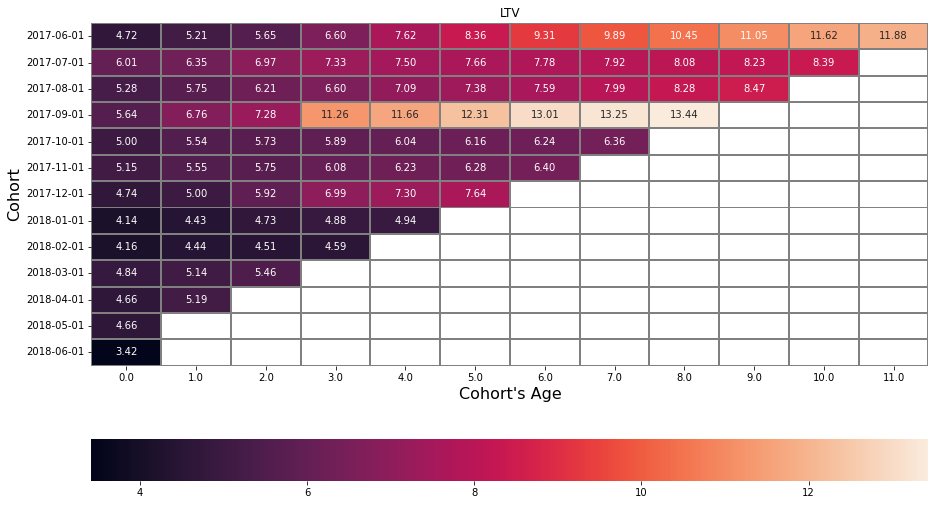

In [91]:
ltv_cohort_piv.index=ltv_cohort_piv.index.astype(str)
plt.figure(figsize=(15,9))
sns.heatmap(ltv_cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='LTV')
plt.xlabel( "Cohort's Age" , size = 16 )
plt.ylabel( "Cohort" , size = 16 )
plt.show()

*The Big Picture Thus Far*:
* Remember that LTV it's the total amount of money a customer brings to the company on average by making purchases. We can see that the 2017-06 was an amazing cohort, the total amount of money a customer brings to the company on average increased over the year! Amazing!
* Also the 2017-09 cohort is one of our favorite ones!
* In general, It seems that the average amount of money that users spend in the company increased over the months.  Good news!

### Sales : What do we take with us? 
* When do people start buying? 
    * The overall conversion rate is 16%! This means that 16% of users who visit Yandex.Afisha eventually make a purchase. Not bad, but not great! 
    * 68.56% of our users made their first purchase the first day they visited. Good news!
    * The majority of our customers (35,265) make their first purchase within the first 2 days (day 0 - 1) of their first visit to the platform, that's great!
* How many orders do they make during a given period of time? 
    * We see a nice rise in sales as the year progresses 
    * Pay attention! In the MAU graph we can appreciate that sice November 2017 the number of users that use Yandex.Afisha decreased, and also  the number of total orders by month! Interesting! These means that less users less sales!
    * The overall average of orders do users makes each month/cohort is 794, while the 2017-06 was a month with 2354 orders! Big difference!
* What is the average purchase size?
    * The revenues amounts are between 0 to 25, orders with values greater than 25 are few.
    * The mean revenue is 6.9 and for 75% of our orders the revenue is around the 5.8.
    * We have 79 orders with a revenue above 200.
    * We have two orders with a renueve extremely high!
    * We see a nice rise in the average renueve by order as the year progresses, with a maximun average renueve of 13.5 in 2017-12. And then the average renueve decrease in the next months.
    * Perhaps in December Yandex.Afisha had fewer ticket orders, but the revenue from these orders was higher than in previous months. In other words, the orders were more expensive. Maybe the tickets in general were more expensive because the season  (Christmas) or maybe more tickets were bought in each order than those that are generally bought. 
    * The overall average renueve by order each month is 6.9, while 2017-12 was a month with a average renueve of 13.5! Big difference!
* How much money do they bring? (LTV)
    * 2017-06 was an amazing cohort, the total amount of money a customer brings to the company on average increased over the year! Amazing!
    * Also the 2017-09 cohort is one of our favorite ones!
    * In general, It seems that the average amount of money that users spend in the company increased over the months.  Good news!

## Marketing

### How much money was spent?
**Overall/per source/over time**

In [92]:
#First, let's remember how our expenses table looks like
expenses.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


To answer this questions  we just need **expenses** table. We will group costs by dt column (date) or source_id column (source) and visualize it. Simple as it sounds :) 

In [93]:
#sorting cost for futher visualization
expenses=expenses.sort_values(by=['dt','source_id'])
expenses.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
363,2,2017-06-01,132.56
726,3,2017-06-01,349.38
1089,4,2017-06-01,76.74
1452,5,2017-06-01,73.24


In [94]:
print('Total marketing cost is {}'.format(expenses['costs'].sum()))

Total marketing cost is 329131.62


**Let's see what how it's split across sources!**

In [95]:
expenses_per_source=expenses.groupby(['source_id'])['costs'].sum().reset_index()
expenses_per_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


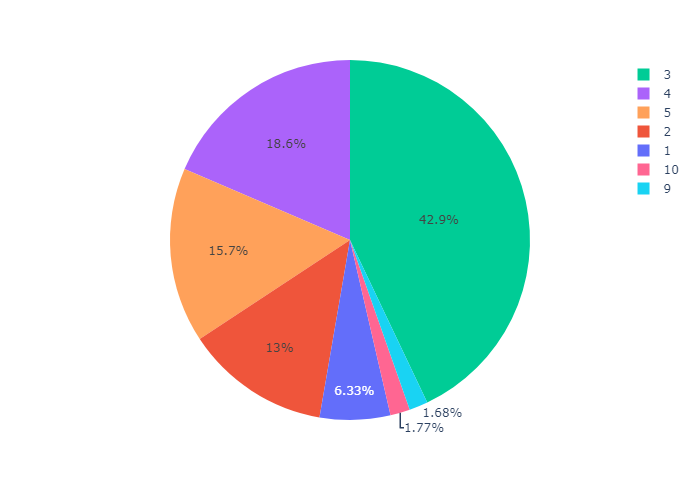

In [96]:
#plotting costs by source
fig = px.pie(expenses_per_source, values="costs", color='source_id', names='source_id')
fig.show("png")

* Almost 43% of our marketing expenses come from source 3. We hope source 3 is bringing us good income! 
* We will check the incomes from each source to see if we get what we pay! (We will check it in the next part of the analysis)

**Let's see what how it's split across the year!**

In [97]:
#Calculating the month for each date
expenses['dt'] = expenses['dt'].astype('datetime64[M]')

In [98]:
# calculating total expenses by month
expenses_per_month=expenses.groupby(['dt'])['costs'].sum().reset_index()
expenses_per_month.head()

,dt,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


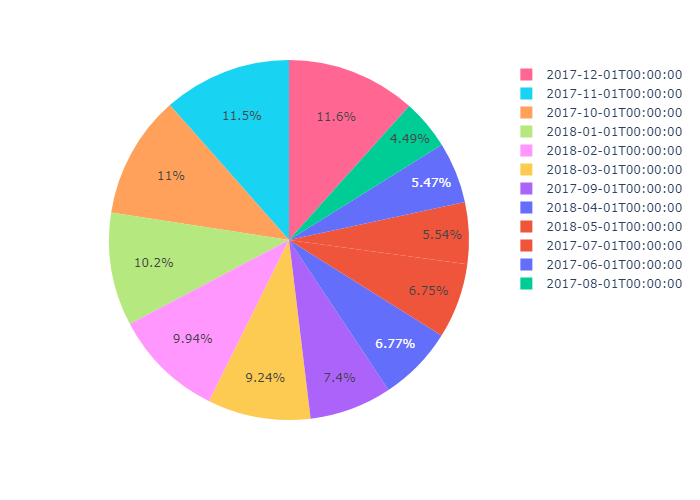

In [99]:
#plotting costs over time
fig = px.pie(expenses_per_month, values="costs", color='dt', names='dt')
fig.show("png")

* Marketing expenses per month are divided more or less evenly throughout the year.
* But hey! Pay attention! As of month 10,2017 our percentage of marketing costs increases, being the month of December 2017 the month with the highest percentage of marketing expenses, with 11.6%. Maybe the company wants to be ready for christmas and for the Black Fryday? Sounds logical that in busy month the marketing expenses are higher.
* If we think about it, the numbers of orders and revenue in the Black Friday and christmas were higher, so also the marketing expenses should me. Let's remember how the revenue by months looks like.

In [100]:
print(orders.groupby(['order_month'])['revenue'].sum())

order_month
2017-06-01     9557.49
2017-07-01    12539.47
2017-08-01     8758.78
2017-09-01    18345.51
2017-10-01    27987.70
2017-11-01    27069.93
2017-12-01    36388.60
2018-01-01    19417.13
2018-02-01    25560.54
2018-03-01    28834.59
2018-04-01    16858.06
2018-05-01    20735.98
2018-06-01        3.42
Name: revenue, dtype: float64


**11% of the Yandex.Afisha marketing expenses were used in the month of December, while the month with the lowest percentage of marketing expenses is 08 of 2017, with 4.5%. Almost half!. However, the total revenue of Yandex.Afisha in month 08 of 2017 was 8758, while the revenue for month 12 of 2017 was 36388, 4 times more than in August!**

**Let's see what how it's split across months and sources!**

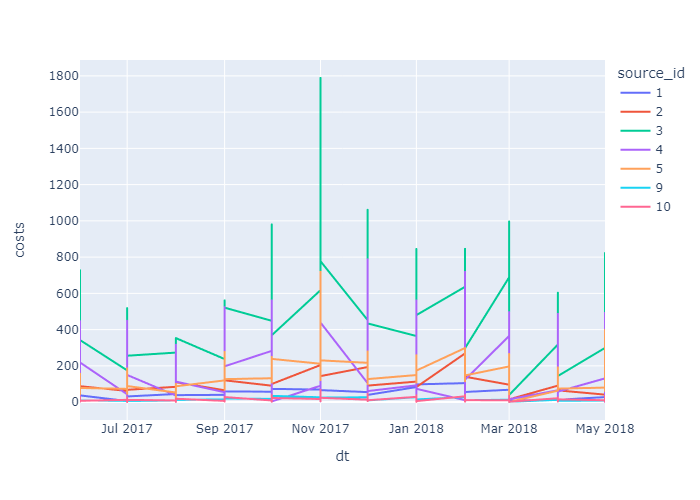

In [101]:
#plotting costs over time
fig = px.line(expenses, x="dt", y="costs", color='source_id')
fig.show("png")

**Cool! We see that Yandex.Afisha marketing expenses are higher for the source 3, especially in the month of Nov 2017.** <br>
Apart from that it seems that the distribution is homogeneous through the different resources and dates. Nothing out of the ordinary 

*The Big Picture Thus Far*:
* Total marketing cost is 329131.62
* Almost 43% of our marketing expenses come from source 3.
* Marketing expenses per month are divided more or less evenly throughout the year.
* As of month 10,2017 our percentage of marketing costs increases, being the month of December 2017 the month with the highest percentage of marketing expenses, with 11.6% .
* In the month of December we spent on marketing twice what we spent in the month of August, but the income we obtained in the month of December was 4 times greater than what we obtained in August. This is surely due to the fact that the marketing effect also works in the long term. The customer does not always make a purchase after seeing the Yandex.Afisha ad. But one day there may be a special event and he remember seeing a Yandex.Afisha ad and decide to use our services!. 

### How much did customer acquisition from each of the sources cost? 

For customer acquistion we will calculate it based on **customers** not visitors.<br>
So we will use buyers from orders table. But first we need to calculate the income for each month. Let's do it by month. We need to group costs  by month then.

In [102]:
#Let's take a look at the table to remember how it's look 
expenses.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
363,2,2017-06-01,132.56
726,3,2017-06-01,349.38
1089,4,2017-06-01,76.74
1452,5,2017-06-01,73.24


In [103]:
#Calculating the month for each date
expenses['dt'] = expenses['dt'].astype('datetime64[M]')

In [104]:
#grouping by month and calculating the total marketing expenses for each month
expenses_by_month=expenses.groupby(['dt'])['costs'].sum().reset_index()
expenses_by_month.columns=['cost_month','costs']
expenses_by_month.head()

,cost_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


In [105]:
# grouping by first_order_month and calculating the total buyers for each month
buyers_per_month=orders.groupby(['first_order_month'])['uid'].nunique().reset_index()
buyers_per_month.columns=['cost_month','buyers']
buyers_per_month.head()

,cost_month,buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [106]:
# Calculating CAC - How much each user that bought something cost for the company, by month
CAC_per_month=expenses_by_month.merge(buyers_per_month,how='left',on=['cost_month'])
CAC_per_month['CAC']=CAC_per_month['costs']/CAC_per_month['buyers']
CAC_per_month.head()

,cost_month,costs,buyers,CAC
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1923,9.485486
2,2017-08-01,14790.54,1370,10.796015
3,2017-09-01,24368.91,2581,9.441654
4,2017-10-01,36322.88,4340,8.369327


**Let's make some visualizations!<br>**
We want to see how much each user who buys something in Yandex.Afisha costs in terms of marketing, per month.

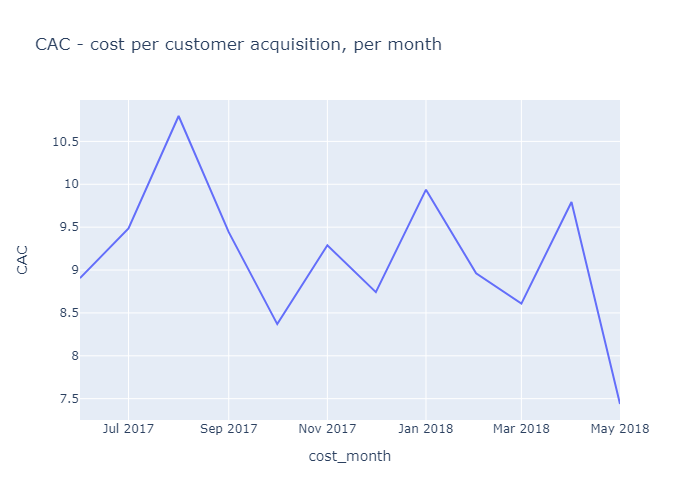

In [107]:
fig = px.line(CAC_per_month, x="cost_month", y="CAC", title='CAC - cost per customer acquisition, per month ')
fig.show("png")

*The Big Picture Thus Far*:
* Surprise! The cost per customer acquisition decreased after August! August was for real a bad month also for sales, but hey! September did 18345 in incomes, while August did 8758! and the CAT decreased in september also.  
* In general, we see that the total revenue increase from September, with November and December like the champions in revenue terms, but CAC decreased most of the time after month august, with small and brief peaks, and then decreases again.
* What's going on? Despite investing less in our buyers, we have a higher sales income for the following two reasons: <br>
    1 - Special events that don't need advertising! Like christmas events and Black Friday<br>
    2 - Advertising has a long-term effect, turning users into customers in the future  

### CAC per source

In order to calculate CAC per source we need to know the original source of the user. If we check our original dataset we will see that users can come from different sources. <br>
We look at orders table because even if the user didn't buy something, he still came from a source ( use visits table for that)

In [108]:
visits.groupby(['uid'])['source_id'].nunique().head()

uid
11863502262781     1
49537067089222     1
297729379853735    1
313578113262317    1
325320750514679    1
Name: source_id, dtype: int64

Not all users have one source, let's define the first that they came from as the main source.

In [109]:
first_source=visits.sort_values('first_session').groupby('uid').first()['source_id'].reset_index()
first_source.columns=['uid','first_source']
first_source.head()

,uid,first_source
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


**We will merge this data back to orders table because CAC calculations are based on buyers**

In [110]:
orders=orders.merge(first_source,on=['uid'],how='left')
orders.head()

,buy_ts,revenue,uid,first_purchase,order_date,first_order_month,order_month,first_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01,3


**Let's see how CAC was changing for each source across time!**

In [111]:
expenses.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
363,2,2017-06-01,132.56
726,3,2017-06-01,349.38
1089,4,2017-06-01,76.74
1452,5,2017-06-01,73.24


In [112]:
# groping by month and source_id to calculate the cost by month and source
expenses_by_month_source=expenses.groupby(['dt','source_id'])['costs'].nunique().reset_index()
expenses_by_month_source.columns=['cost_month','source_id','costs']
expenses_by_month_source.head()

,cost_month,source_id,costs
0,2017-06-01,1,29
1,2017-06-01,2,30
2,2017-06-01,3,30
3,2017-06-01,4,30
4,2017-06-01,5,30


In [113]:
# grouping by first_order_month and first_source and calculate the counts of buyers
buyers_per_month_source=orders.groupby(['first_order_month','first_source'])['uid'].nunique().reset_index()
buyers_per_month_source.columns=['cost_month','source_id','buyers']
buyers_per_month_source.head()

,cost_month,source_id,buyers
0,2017-06-01,1,208
1,2017-06-01,2,279
2,2017-06-01,3,587
3,2017-06-01,4,410
4,2017-06-01,5,372


In [114]:
#actual cac calculations
CAC_per_month_source=expenses_by_month_source.merge(buyers_per_month_source,how='left',on=['cost_month','source_id'])
CAC_per_month_source['CAC']=CAC_per_month_source['costs']/CAC_per_month_source['buyers']
CAC_per_month_source.head()

,cost_month,source_id,costs,buyers,CAC
0,2017-06-01,1,29,208,0.139423
1,2017-06-01,2,30,279,0.107527
2,2017-06-01,3,30,587,0.051107
3,2017-06-01,4,30,410,0.073171
4,2017-06-01,5,30,372,0.080645


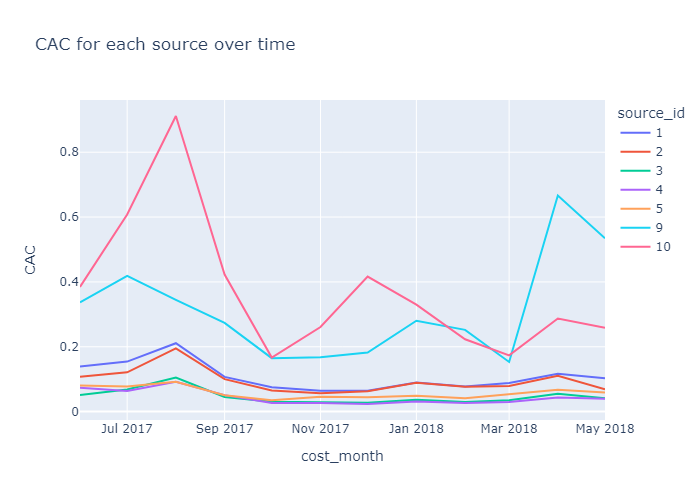

In [115]:
#plotting cac dynamics
fig = px.line(CAC_per_month_source, x="cost_month", y="CAC",color='source_id',title='CAC for each source over time')
fig.show("png")

**Let's calculate overall average CAC per source**

In [116]:
print(CAC_per_month_source.groupby(['source_id'])['CAC'].mean().reset_index())

   source_id       CAC
0          1  0.107522
1          2  0.094226
2          3  0.046210
3          4  0.043906
4          5  0.057944
5          9  0.314674
6         10  0.370230


**Ad source 6 and 7  are organic! They don't cost us money, but do they generate sales?**

In [117]:
print(orders.groupby(['first_source'])['revenue'].sum().reset_index())

   first_source   revenue
0             1  39188.50
1             2  63847.96
2             3  46118.08
3             4  52625.35
4             5  39688.05
5             7      1.22
6             9   6668.92
7            10   3919.12


Only source 7  generated incomes, but only a revenue of 1.22. No significant at all.

**Before we continue! Let's make a last important calculation : LTV VS CAC!<br>**

* Let's find the LTV of the first cohort by adding up the value for each month:

In [118]:
ltv_201761 = ltv_cohort_piv.loc['2017-06-01'].sum()
ltv_201761 

102.3689520514088

On average, each customer from the first cohort brought 102.3 in revenue over their 12-month liftetime.

* Let's calculate CAC for this cohort. We'll divide the the costs for the cohort month by the number of people:

In [119]:
# getting the necessary cohort
cohort_201761 = CAC_per_month[CAC_per_month['cost_month'] == '2017-06-01']

# calculating costs for the cohort month
costs_201761 = CAC_per_month[CAC_per_month['cost_month'] == '2017-06-01']['costs'].sum()

n_buyers_201761 = cohort_201761['buyers'][0]
cac_201761 = costs_201761 / n_buyers_201761

print('CAC =', cac_201761)
print('LTV =', ltv_201761) 

CAC = 8.905091448344043
LTV = 102.3689520514088


**Acquiring each customer cost the company an average of 8.9, while each customer brought in 102. So investment in customer acquisition paid off and even led to profit** 

*The Big Picture Thus Far*: 
*  We can see that the CAC per source for source 10 is highest in almost all the year, with ups and downs after the month of August, but still one of the highest. Only 1,77% of our marketing expenses come from source 10, and 1,68% from source 9 (We saw this in our pie graphs before). It's logical that the company decides to invest less in sources with a high CAC per source. Remember: We want to buy low and sell high.
* Almost 43% of our marketing expenses come from source 3, and his CAC per source is one of the lowers or even the lower one. These are good news! We prefer to invest in markething sources that cost us less in terms of CAC per source. Looks like the company is making good decisions!
* We also now already that ad source 10 almost don't generate visits, plus the CAC per source is high, good we don't invest to much in these source! 
* In general, the high the CAC per source the less Yandex.Afisha invest in terms of marketing. Great!
* Acquiring each customer cost the company an average of 8.9, while each customer brought in 102. So investment in customer acquisition paid off and even led to profit

### How worthwhile where the investments? (ROI)

The moment of truth has come! <br>
But first! Let's make a nice visualization: **Total Revenue VS Total marketing expenses**

In [120]:
#Creating a pivot table by order_month and calculating total revenue by month 
revenue_by_month = pd.pivot_table(orders, values='revenue', index='order_month', aggfunc='sum').reset_index()

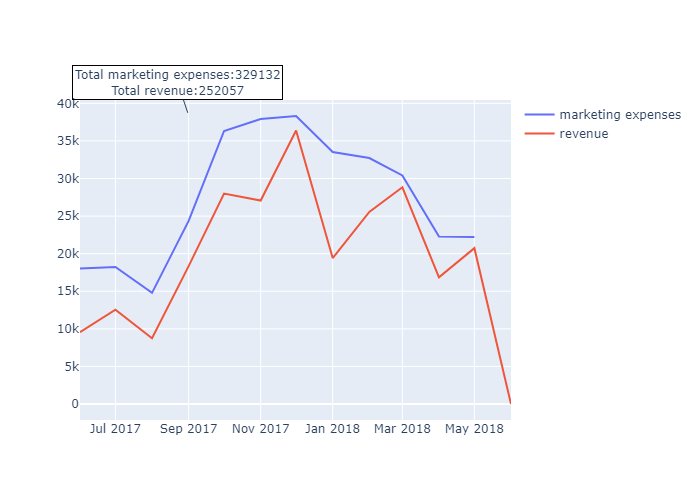

In [121]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=CAC_per_month['cost_month'], 
                        y=CAC_per_month['costs'],
                    mode='lines',
                    name='marketing expenses'))

fig.add_trace(go.Scatter(x=revenue_by_month['order_month'], 
                        y=revenue_by_month['revenue'],         
                    mode='lines',
                    name='revenue',))
fig.update_layout(showlegend=True,
                  annotations=[
                      go.layout.Annotation(
                          text='Total marketing expenses:{:.0f}<br>Total revenue:{:.0f}'.format(CAC_per_month['costs'].sum(),revenue_by_month['revenue'].sum()),  
                          xref='paper',
                          yref='paper',
                          x=0.25,
                          y=0.96,
                          bordercolor= 'black'  )
                  ] )
fig.show("png")

**Looks like were are in problems!** <br>
But before we rush to conclusions, let's calculate the ROI.

**ROI - return on investment** <br>
Marketing ROI is exactly what it sounds like: a way of measuring the return on investment from the amount a company spends on marketing. 

**Let's do two version together: ROI per cohort and per source.**

**ROI per cohort**  <div>
In general, we do:  ROI=LTV/CAC
    <div>
We already have calculations on CAC per month and we have info on ltv in ltv_cohort. <div>
So let's merge and work it out!

In [122]:
# grouping CAC values by month 
CAC_per_month_ROI=CAC_per_month[['cost_month','CAC']]
CAC_per_month_ROI.columns=['first_order_month','CAC']
CAC_per_month_ROI.head()

,first_order_month,CAC
0,2017-06-01,8.905091
1,2017-07-01,9.485486
2,2017-08-01,10.796015
3,2017-09-01,9.441654
4,2017-10-01,8.369327


In [123]:
#Merging ltv_cohort and CAC_per_month_ROI table to make the table ROI
ROI=ltv_cohort.merge(CAC_per_month_ROI,on=['first_order_month'],how='left')
ROI.head()

,first_order_month,month,revenue,cohort_size,age,ltv,CAC
0,2017-06-01,2017-06-01,9557.49,2023,0.0,4.724414,8.905091
1,2017-06-01,2017-07-01,981.82,2023,1.0,0.485329,8.905091
2,2017-06-01,2017-08-01,885.34,2023,2.0,0.437637,8.905091
3,2017-06-01,2017-09-01,1931.30,2023,3.0,0.954671,8.905091
4,2017-06-01,2017-10-01,2068.58,2023,4.0,1.022531,8.905091


In [124]:
# Adding a column with the ROI calculations
ROI['ROI']=ROI['ltv']/ROI['CAC']

In [125]:
#Making a pivot table for ROI cohorts!
roi_piv = ROI.pivot_table(
    index='first_order_month', columns='age', values='ROI', aggfunc='mean'
).cumsum(axis=1).round(2) 
roi_piv

age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


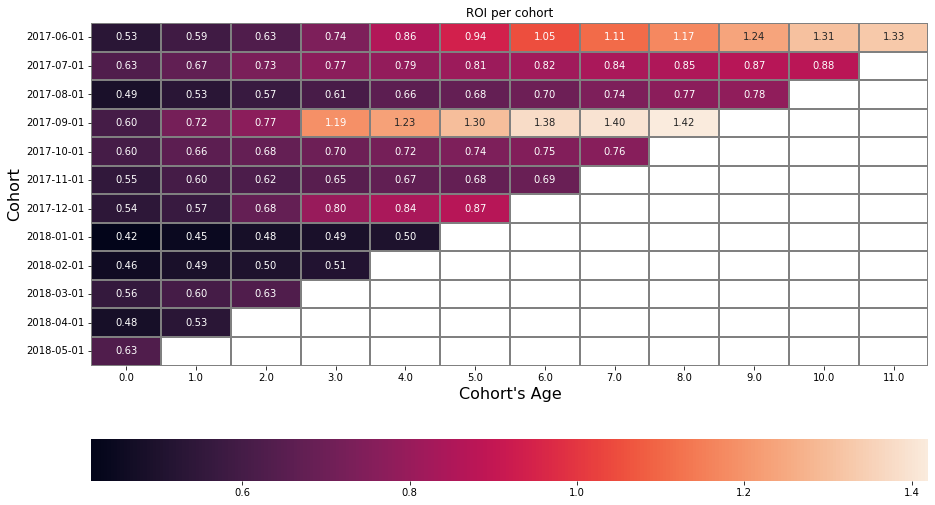

In [126]:
roi_piv.index=roi_piv.index.astype(str)
plt.figure(figsize=(15,9))
sns.heatmap(roi_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='ROI per cohort')
plt.xlabel( "Cohort's Age" , size = 16 )
plt.ylabel( "Cohort" , size = 16 )
plt.show()

*The Big Picture Thus Far*: 
* The 09,2017 cohort paid off in the 3th month (ROMI = 1.19). (Remember, we start counting at 0.)
* The 06,2017 cohort also paid off,  in the 6th month (ROMI = 1.05).
* All rest of cohorts don't paid off. Bad news!

**ROI per source**

In [127]:
# grouping by source, calculating buyers and total revenue
ltv_per_source=orders.groupby(['first_source'])['uid','revenue'].agg({'uid':'nunique','revenue':'sum'}).reset_index()
ltv_per_source.columns=['source_id','buyers','revenue']
#calculating and adding ltv column
ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['buyers']
ltv_per_source

<ipython-input-127-32d83b81bc93>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,source_id,buyers,revenue,ltv
0,1,3796,39188.50,10.323630
1,2,4302,63847.96,14.841460
2,3,9066,46118.08,5.086927
3,4,9956,52625.35,5.285792
4,5,6779,39688.05,5.854558
5,7,1,1.22,1.220000
6,9,1407,6668.92,4.739815
7,10,1216,3919.12,3.222961


In [128]:
# merging ltv_per_source with roi_per_source table
roi_per_source=expenses_per_source.merge(ltv_per_source,on=['source_id'])
roi_per_source.head()

,source_id,costs,buyers,revenue,ltv
0,1,20833.27,3796,39188.50,10.323630
1,2,42806.04,4302,63847.96,14.841460
2,3,141321.63,9066,46118.08,5.086927
3,4,61073.60,9956,52625.35,5.285792
4,5,51757.10,6779,39688.05,5.854558


In [129]:
# Adding column with cac value
roi_per_source['cac']=roi_per_source['costs']/roi_per_source['buyers']
roi_per_source['romi']=roi_per_source['ltv']/roi_per_source['cac']
roi_per_source

,source_id,costs,buyers,revenue,ltv,cac,romi
0,1,20833.27,3796,39188.50,10.323630,5.488217,1.881054
1,2,42806.04,4302,63847.96,14.841460,9.950265,1.491564
2,3,141321.63,9066,46118.08,5.086927,15.588091,0.326334
3,4,61073.60,9956,52625.35,5.285792,6.134351,0.861671
4,5,51757.10,6779,39688.05,5.854558,7.634917,0.766814
5,9,5517.49,1407,6668.92,4.739815,3.921457,1.208687
6,10,5822.49,1216,3919.12,3.222961,4.788232,0.673100


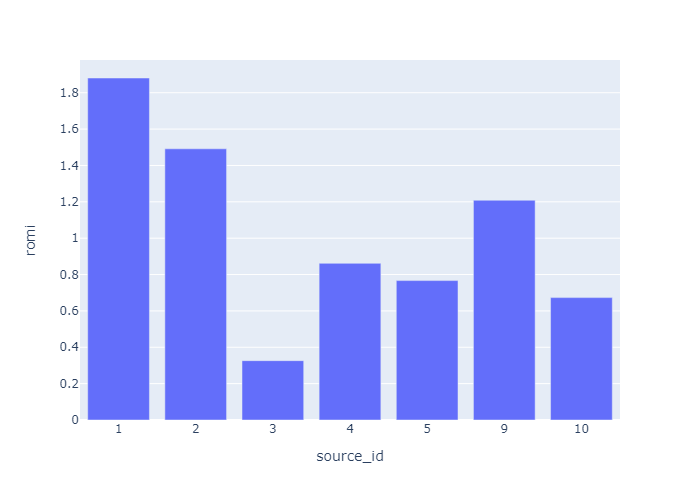

In [130]:
fig = px.bar(roi_per_source, x='source_id', y='romi')
fig.update_xaxes(type='category')
fig.show("png")

*The Big Picture Thus Far*:
* The ad sources 1,2 and 9 paid off.
* All rest of ad sources don't paid off (3,4,5 and 10). Bad news! 
* We should cut out ad source 3 the fast as possible!

### Marketing : What do we take with us? 
* How much money was spent?
    * Overall : Total marketing cost is 329131.62
    * Per source : 
       * Almost 43% of our marketing expenses come from source 3. We hope source 3 is bringing us good income! 
       * The two sources with the lowers marketing expenses are 10 (1,6%) and 9 (1,77%).
    * Over time : 
       * In busy months the marketing expenses are higher.
       * In the month of December we spent on marketing twice what we spent in the month of August, but the income we obtained in the month of December was 4 times greater than what we obtained in August. Possible reason: For some holidays and special events, high advertising investments are not required ,people wants tickets!
* How much did customer acquisition from each of the sources cost?
    * CAC - cost per customer acquisition, per month  
        * The total revenue increase from September, with November and December like the champions in revenue terms, but CAC decreased most of the time after month August. Despite investing less in our buyers, we have a higher sales incomes! Why? : <br>
               1: Special events don't need advertising! Like christmas events and Black Friday
               2: Advertising has a long-term effect, turning users into customers in the future  
    * CAC - cost per customer acquisition by source over time: 
       * The CAC per source for source 10 is highest in almost all the year, followed by source 9. Only 1,77% of our marketing expenses come from source 10, and 1,68% from source 9. It's logical that the company decides to invest less in sources with a high CAC per source. Remember: We want to buy low and sell high.
       * The high the CAC per source the less Yandex.Afisha invest in terms of marketing.  
    * LTV VS CAC! - Acquiring each customer cost the company an average of 8.9, while each customer brought in 102. So investment in customer acquisition paid off and even led to profit.       
* How worthwhile where the investments? (ROI)
    * ROI per cohort
        * Cohorts 09,2017 and 06,2017 paid off. All rest of cohorts don't paid off.
    * ROI per source
        * The ad sources 1,2 and 9 paid off. All rest of ad sources don't paid off (3,4,5 and 10). 
        * We should cut out ad source 3 the fast as possible! (ROI = 0,3)

# Conclusions 

Let's start from the beginner : Users sessions. <br>
It's well know that the more time pass, the more the desire to buy the product goes down. For this reason we want our users to see the schedule and order tickets quickly; and also! We don't want them to visit Yandex.Afisha several times at day. Good news! If a user visits Yandex.Afisha, then he will visit the website or app once that same day. The average time a visitor spends on Yandex.Afisha is 60 seconds! 2 minutes will be more than enough to buy a ticket.

For now we are satisfied!

The top cohort in terms of retention during the first month is 09-2017, with a retention of 7.6%. This percentage saddens us. Even sadder is that retention decreases over time! For all cohorts there are no increases. Bad news! Remember, we want costumers to come back! They generate  incomes without the need to reinvest in them (in marketing terms).
Each user that bought a ticket in Yandex.Afisha did a maximum of 2 orders during the year! We were expecting for more! Our customers do not come back as expected, and they don't order enough throughout the year (per user)!  <br>
We recommend to the company to take actions in order to convince users to come back and make more purchases. For example, a discount for old customers or a customer club with discounts and benefits; making our users feel specials or part of the 'yandex.afisha members club', we will encourage them to return and make more purchases. <br>

We know (thanks to the ROI calculations)  that only two cohorts paid off. Really bad news!  <br>
The total revenue is lower that the total marketing expenses for every month of the year (Graph: Total Revenue VS Total marketing expenses) More bad news! 
But also, looking at LTV VS CAC calculations : Acquiring each customer cost the company an average of 8.9, while each customer brought in 102. So investment in customer acquisition paid off and even led to profit! <br> 
Therefore our problem is that we invest in users who do not bring incomes at all.<br> 
We recommend to the company to improve the ad sources. For example, ad sources 1,2 and 9 paid off. We should invest more in them. <br> 
Having a target audience makes the marketing plan much more cost-effective, as nothing goes to waste. Knowing you have the target audience to guide you means knowing that every dollar put in is taking you in the right direction. For these reason we recomend to Yandex.Afisha to check how the ad sources are targeting audience, maybe we will possible to help them and give them some recommendations.

Good targeting is the key! Because randomly users visiting Yandex.Afisha will not help us. <br>
We can suppose that if more users use Yandex.Afisha the probability of get more purchases increase. But,  it's not about how many users visits us, it's about who they are! For example, in the MAU graph we can appreciate that since November 2017 the number of users that use Yandex.Afisha decreased, while  the number of total orders by month increases! These means that less users did more sales! These users were focus in Black Fridays discounts and specials, and don't forget about christmas and christmas events!. If our ad sources look for people that are interesting in these events and sales we will get more orders. It is obviously easier for them to do a good audience targeting when there are big events, but we expect from them to manage to do a good targeting also when the stages are smallest and individual.